# CAN data Analysis using `strym`

In this notebook, we will analyze data rates throughput and the timeseries characteristics of certain CAN message collected from Toyota RAV4 using Giraffee connector and Panda.

## Importing packages
Import required packages

In [1]:
from strym import strymread
import strym
import matplotlib.pyplot as plt
import numpy as np

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading BokehJS ...

## Specify Data Location

In [2]:
datafolder = "../../PandaData/2020_02_03/"
import glob
csvlist = glob.glob(datafolder+"*.csv")

In [3]:
num_of_files = len(csvlist)
print("Total number of datafiles in {} is {}.".format(datafolder, num_of_files))

Total number of datafiles in ../../PandaData/2020_02_03/ is 19.


## Analysis
### 1. CSV file containing all messages
In this section, we will analyze CSV-formatted CAN Data for data throughput, rates and data distribution.

In [4]:
dbcfile = '../examples/newToyotacode.dbc'
r0 = strymread(csvfile=csvlist[0], dbcfile=dbcfile)

### First plot the count statistics of CAN messages

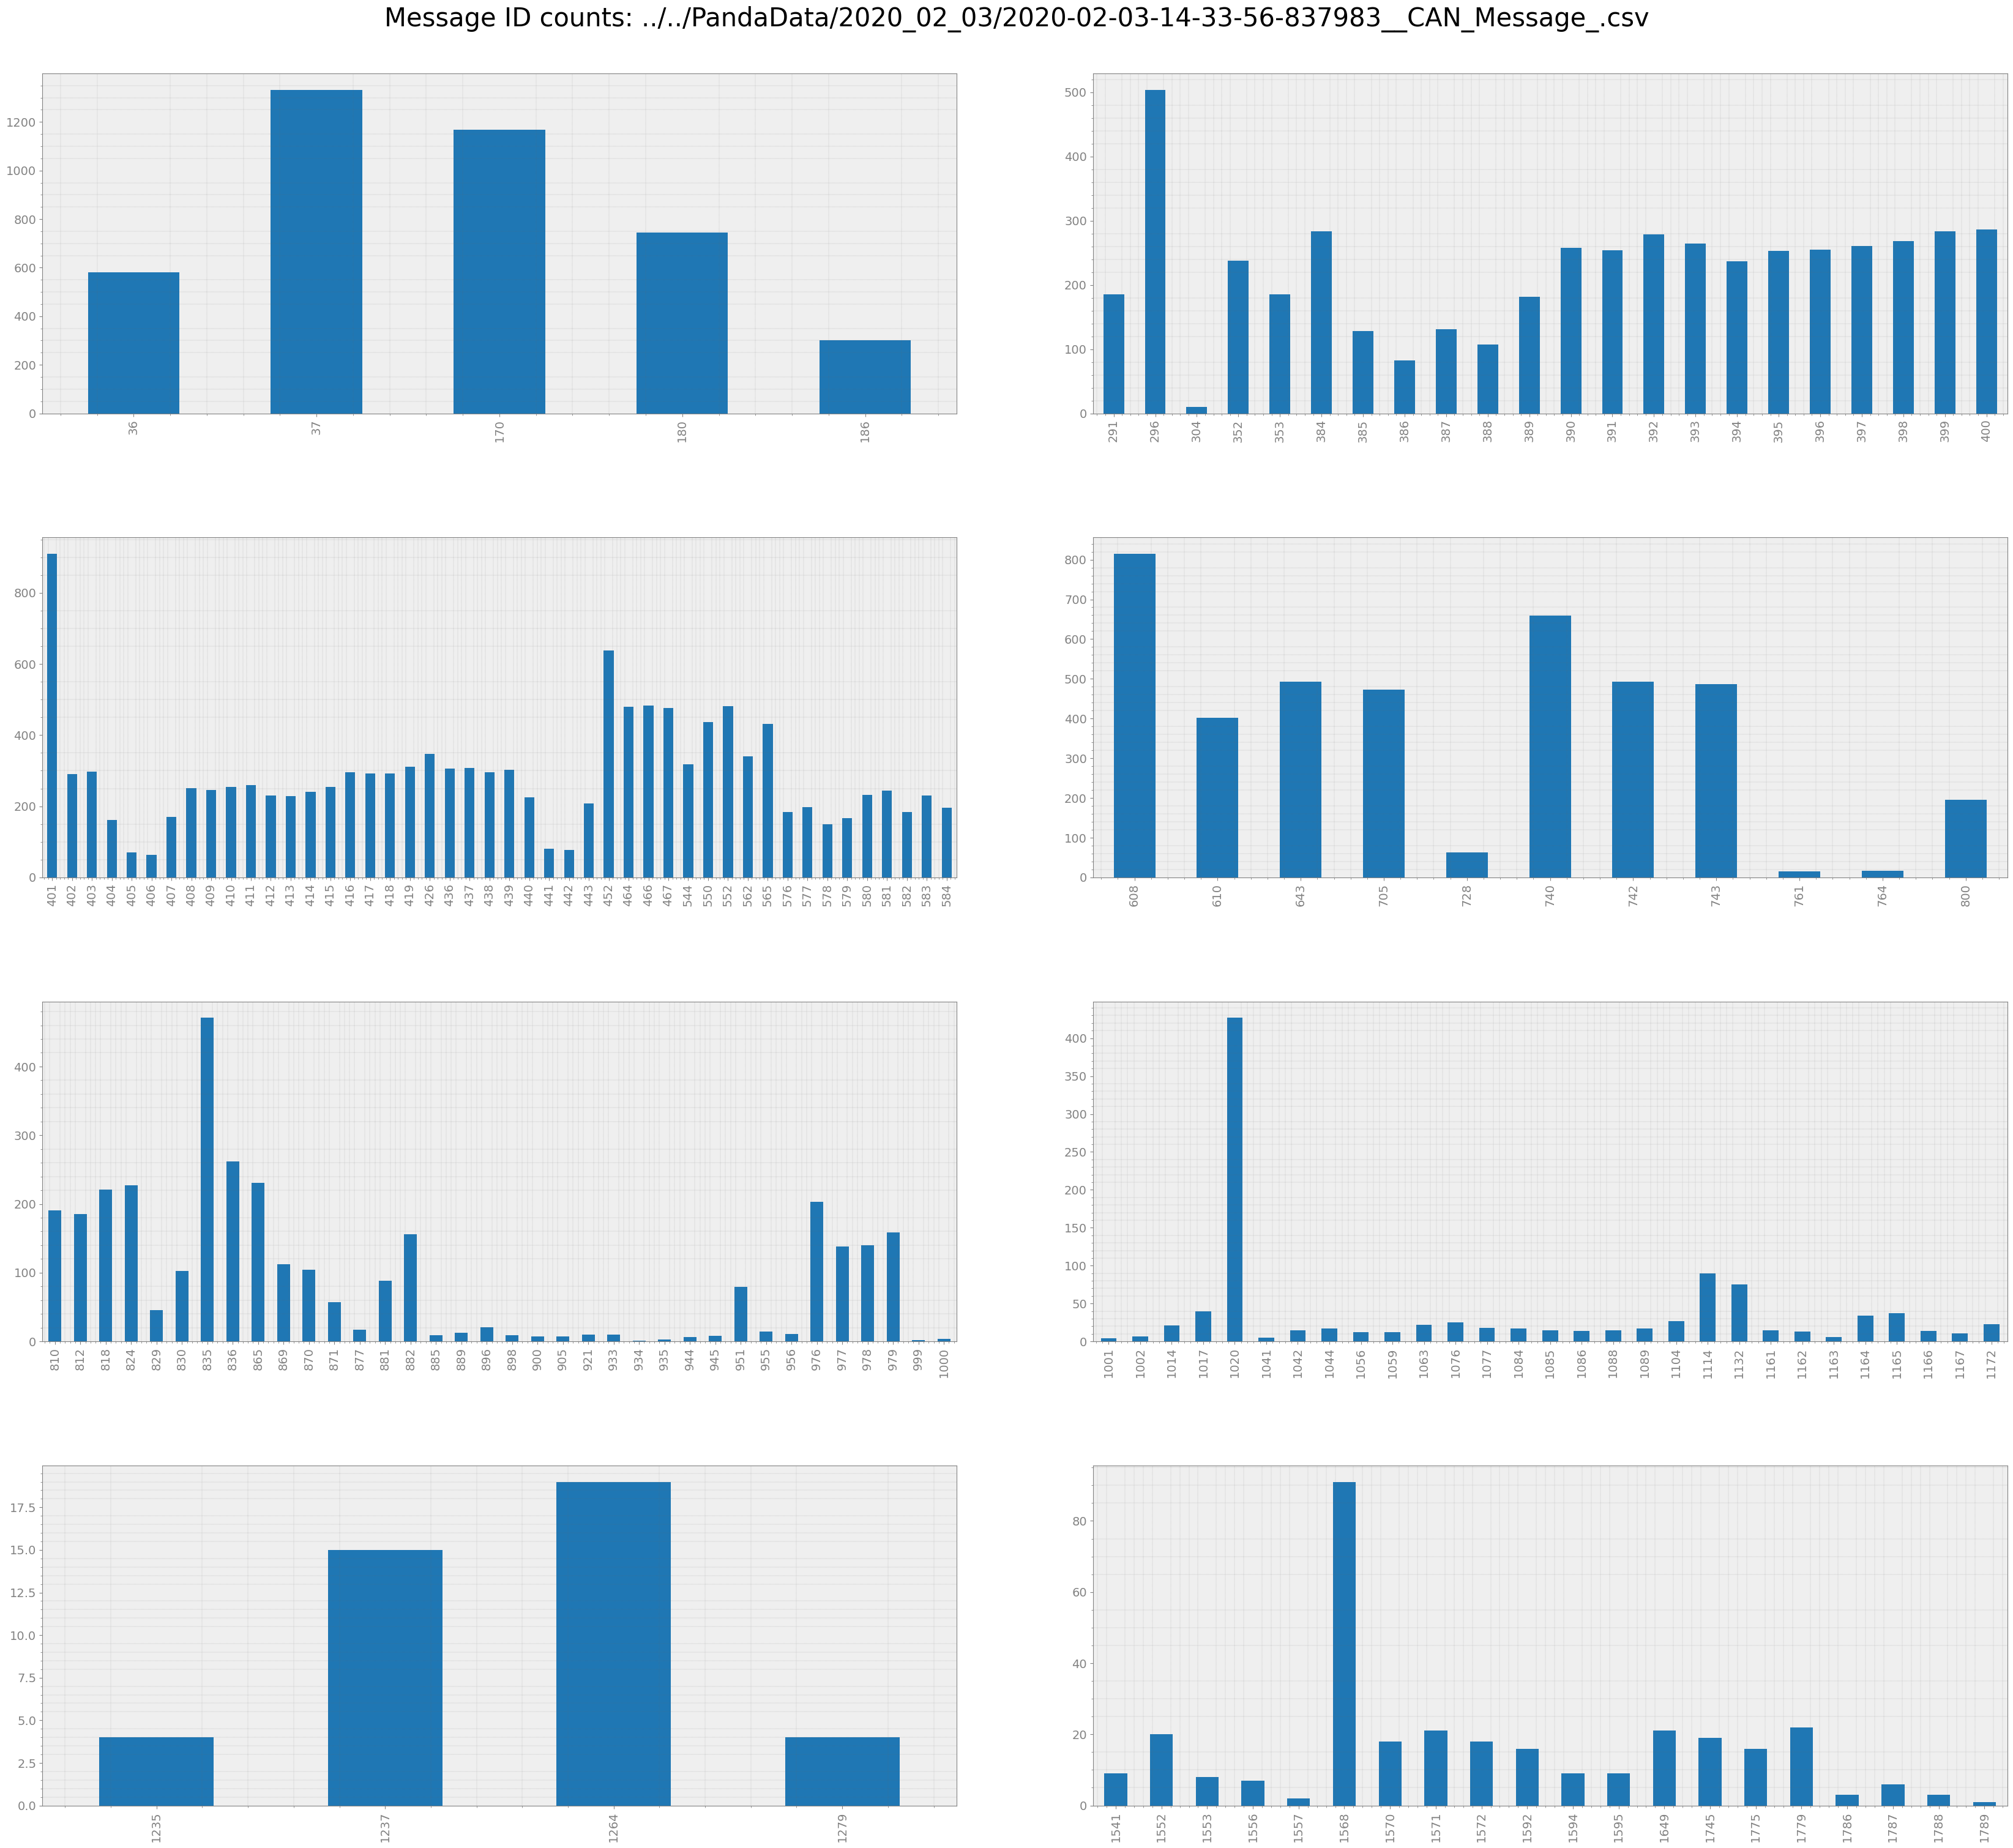

,MessageID,Counts_Bus_0,Counts_Bus_1,TotalCount
36,36,582,0,582
37,37,1333,0,1333
170,170,1168,0,1168
180,180,745,0,745
186,186,300,0,300
...,...,...,...,...
1779,1779,22,0,22
1786,1786,3,0,3
1787,1787,6,0,6
1788,1788,3,0,3


In [6]:
r0.count(plot=True)

As you can see this particular csv file recorded all messages.

### Plot the speed as timeseries data

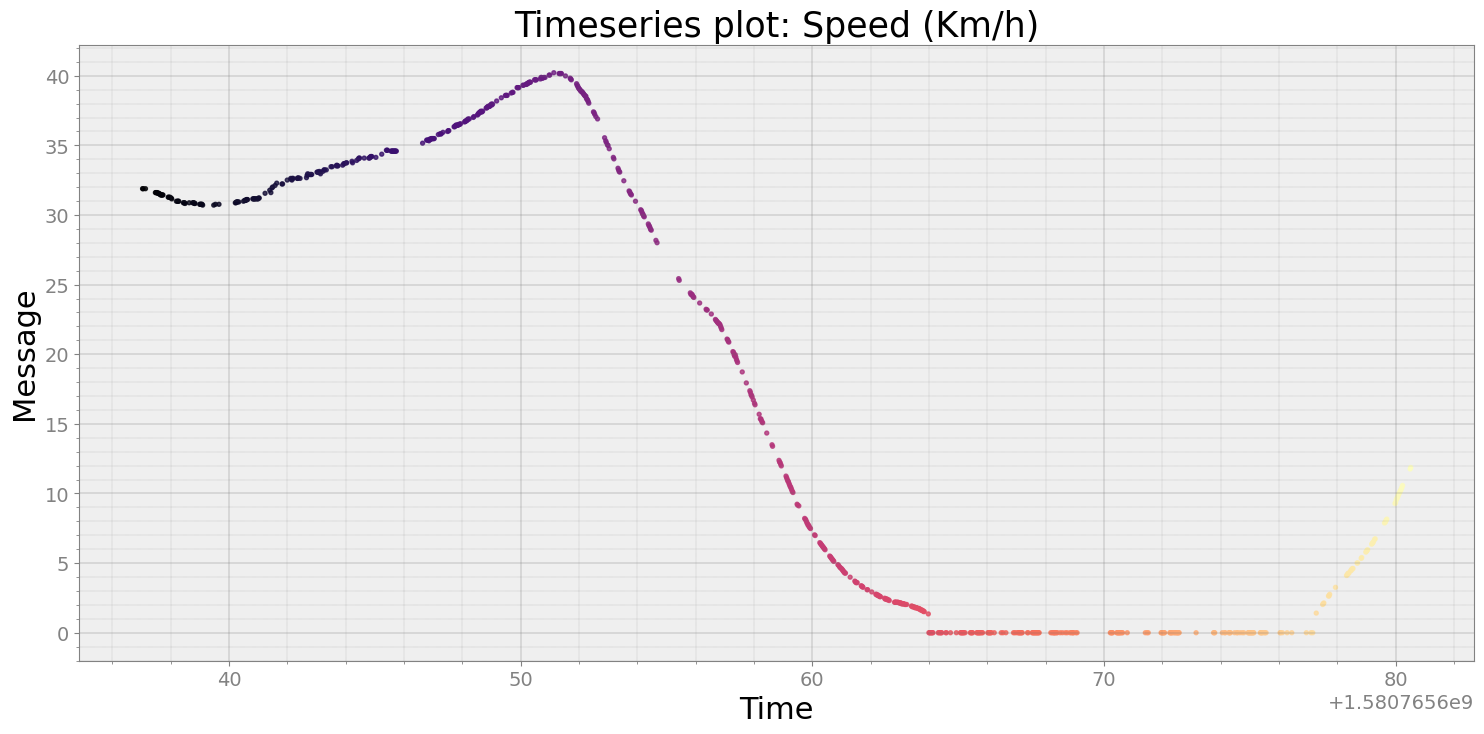

In [8]:
speed = r0.speed()
strymread.plt_ts(speed, title="Speed (Km/h)")

### Create Violin plot and box plot to see distribution of speed data

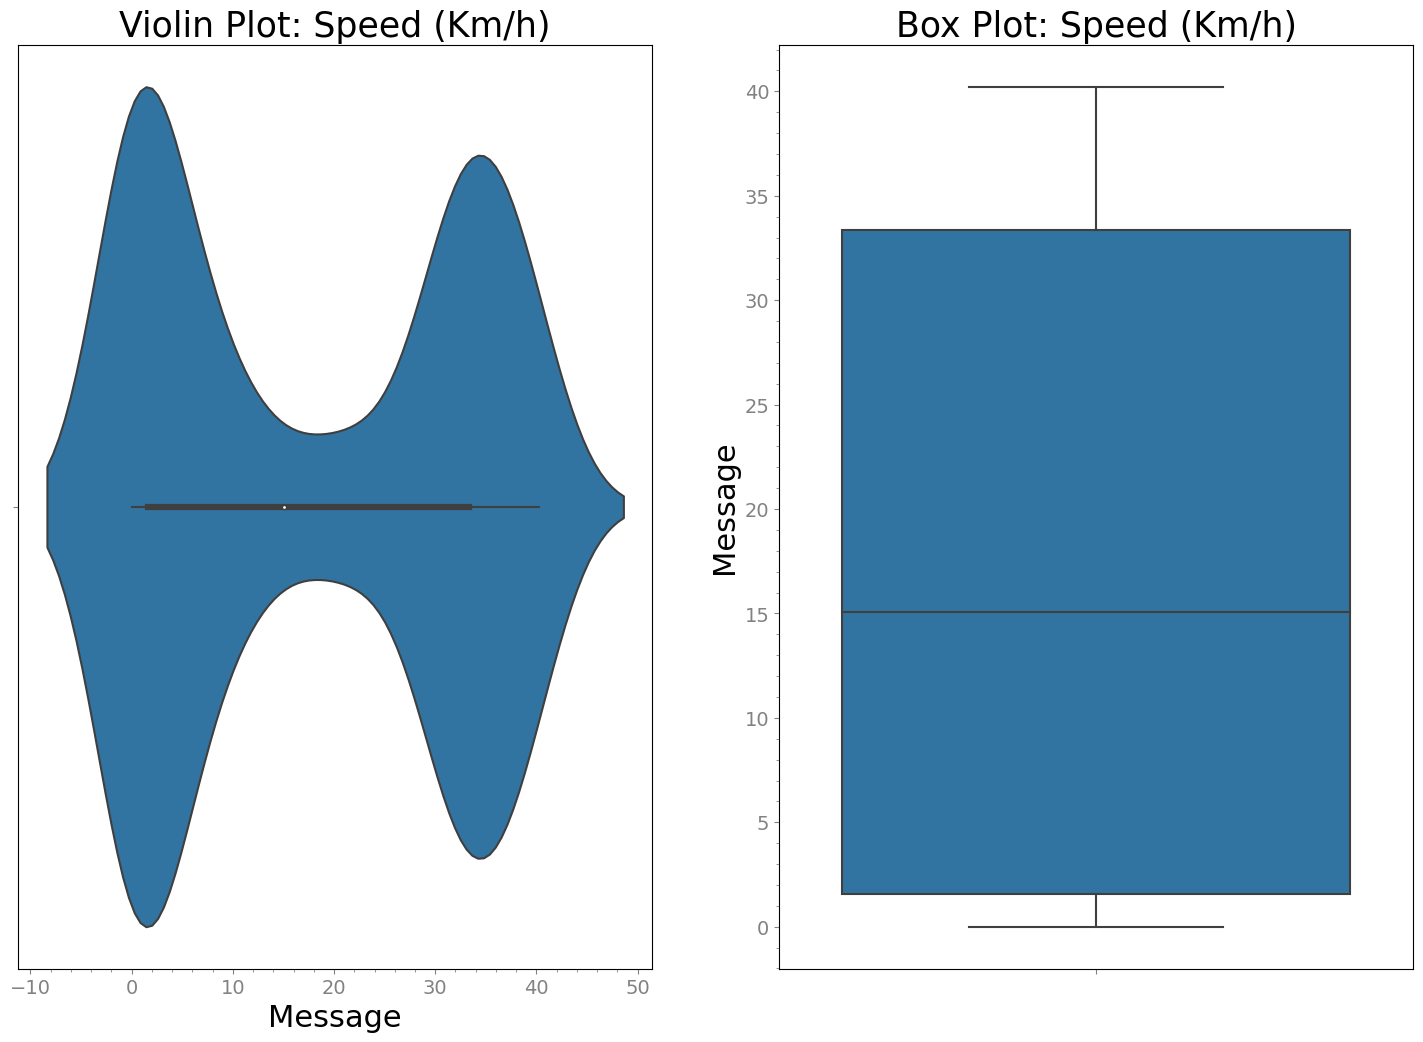

In [9]:
# violin plot of speed data
strymread.violinplot(speed["Message"], title="Speed (Km/h)")

From the violin plot and box plot, we see that data is bimodal with majority of values around 0 km/h or above 40 km/h. Mean is around 20 km/h. It will be interesting to check the characteristics of violin plot for stop-and-go traffic.

### Rate analysis of speed data
We can analyse data throughput of speed data by measuring some statistical characterisitcs of time differences and instantaneous frequency.

Analyzing Timestamp and Data Rate of Speed Data
Interquartile Range of Rate for Speed Data is 25.146205550111343 


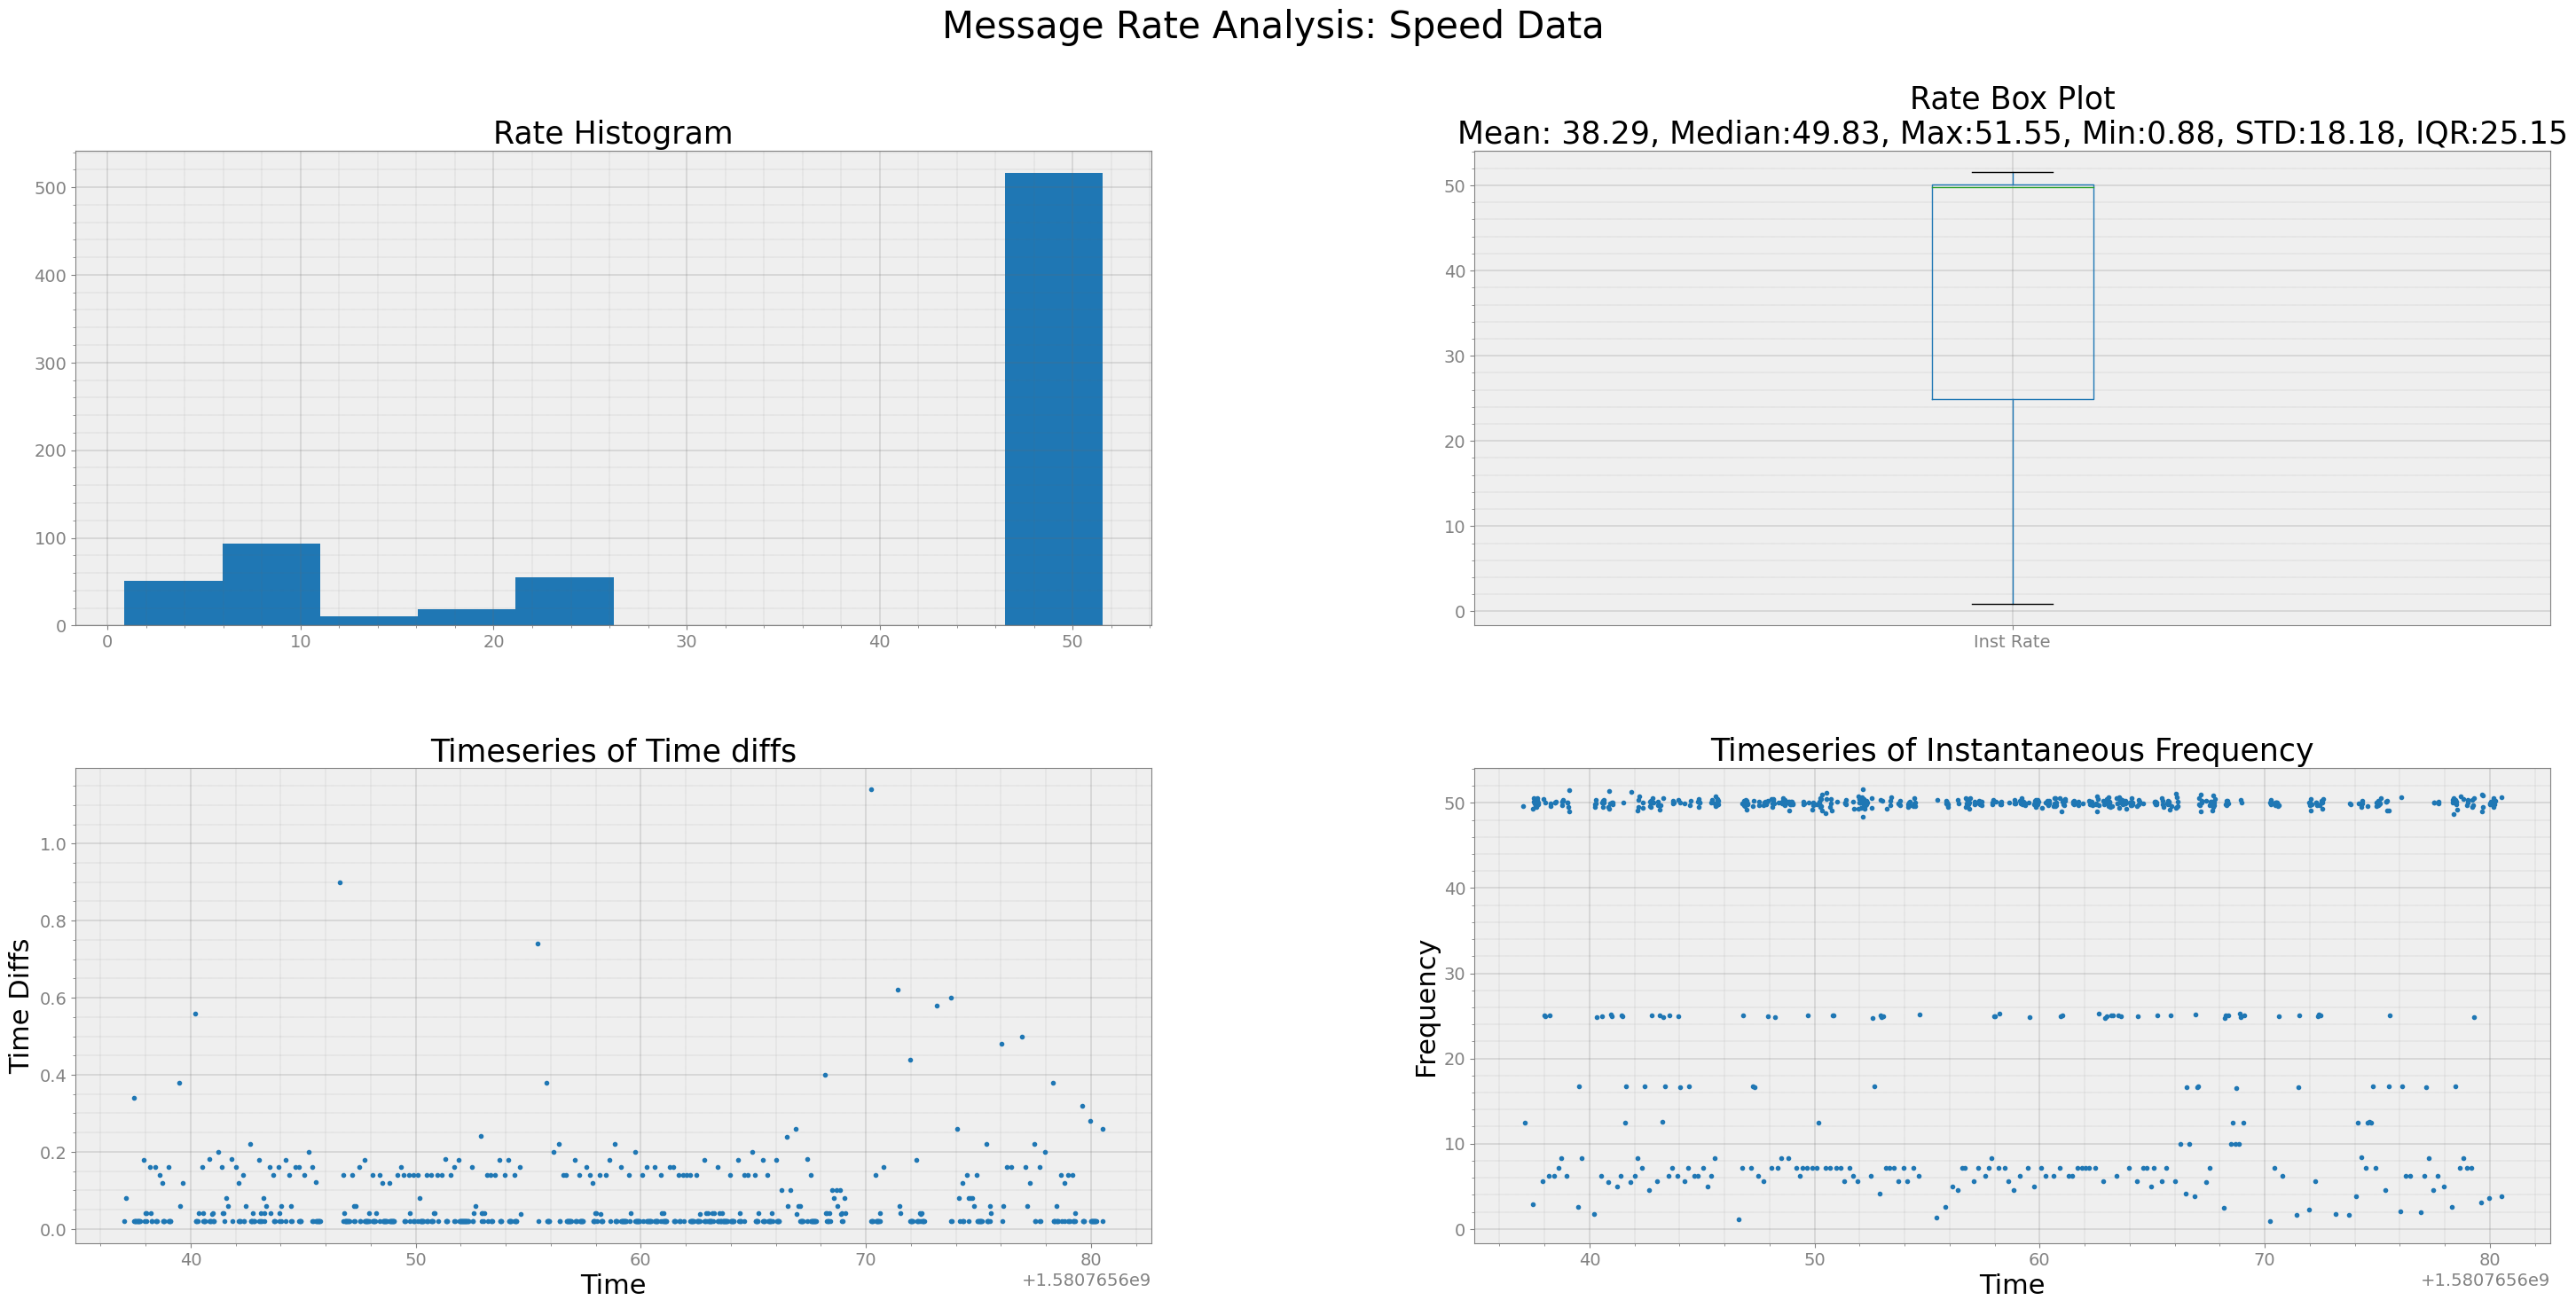

In [10]:
strymread.ranalyze(speed, title='Speed Data')

from above 2x2 plot, we see that speed data came at 50 Hz a little more than half of instances and at 25Hz for little less than half of instances. From box plot, we see that mean data rate is 34.67 Hz and inter-quartile range is 25.05 Hz.  3rd plot is timeseries of time-diffs. Arrival of most of the data has time-difference below 0.05 for most part and some datapoints have arrival interval of more than 0.15 seconds.

### Rate analysis of RADAR traces: TRACK A 0

Analyzing Timestamp and Data Rate of Longitudinal Distance Data: TRACK A 0
Interquartile Range of Rate for Longitudinal Distance Data: TRACK A 0 is 14.935477600655974 


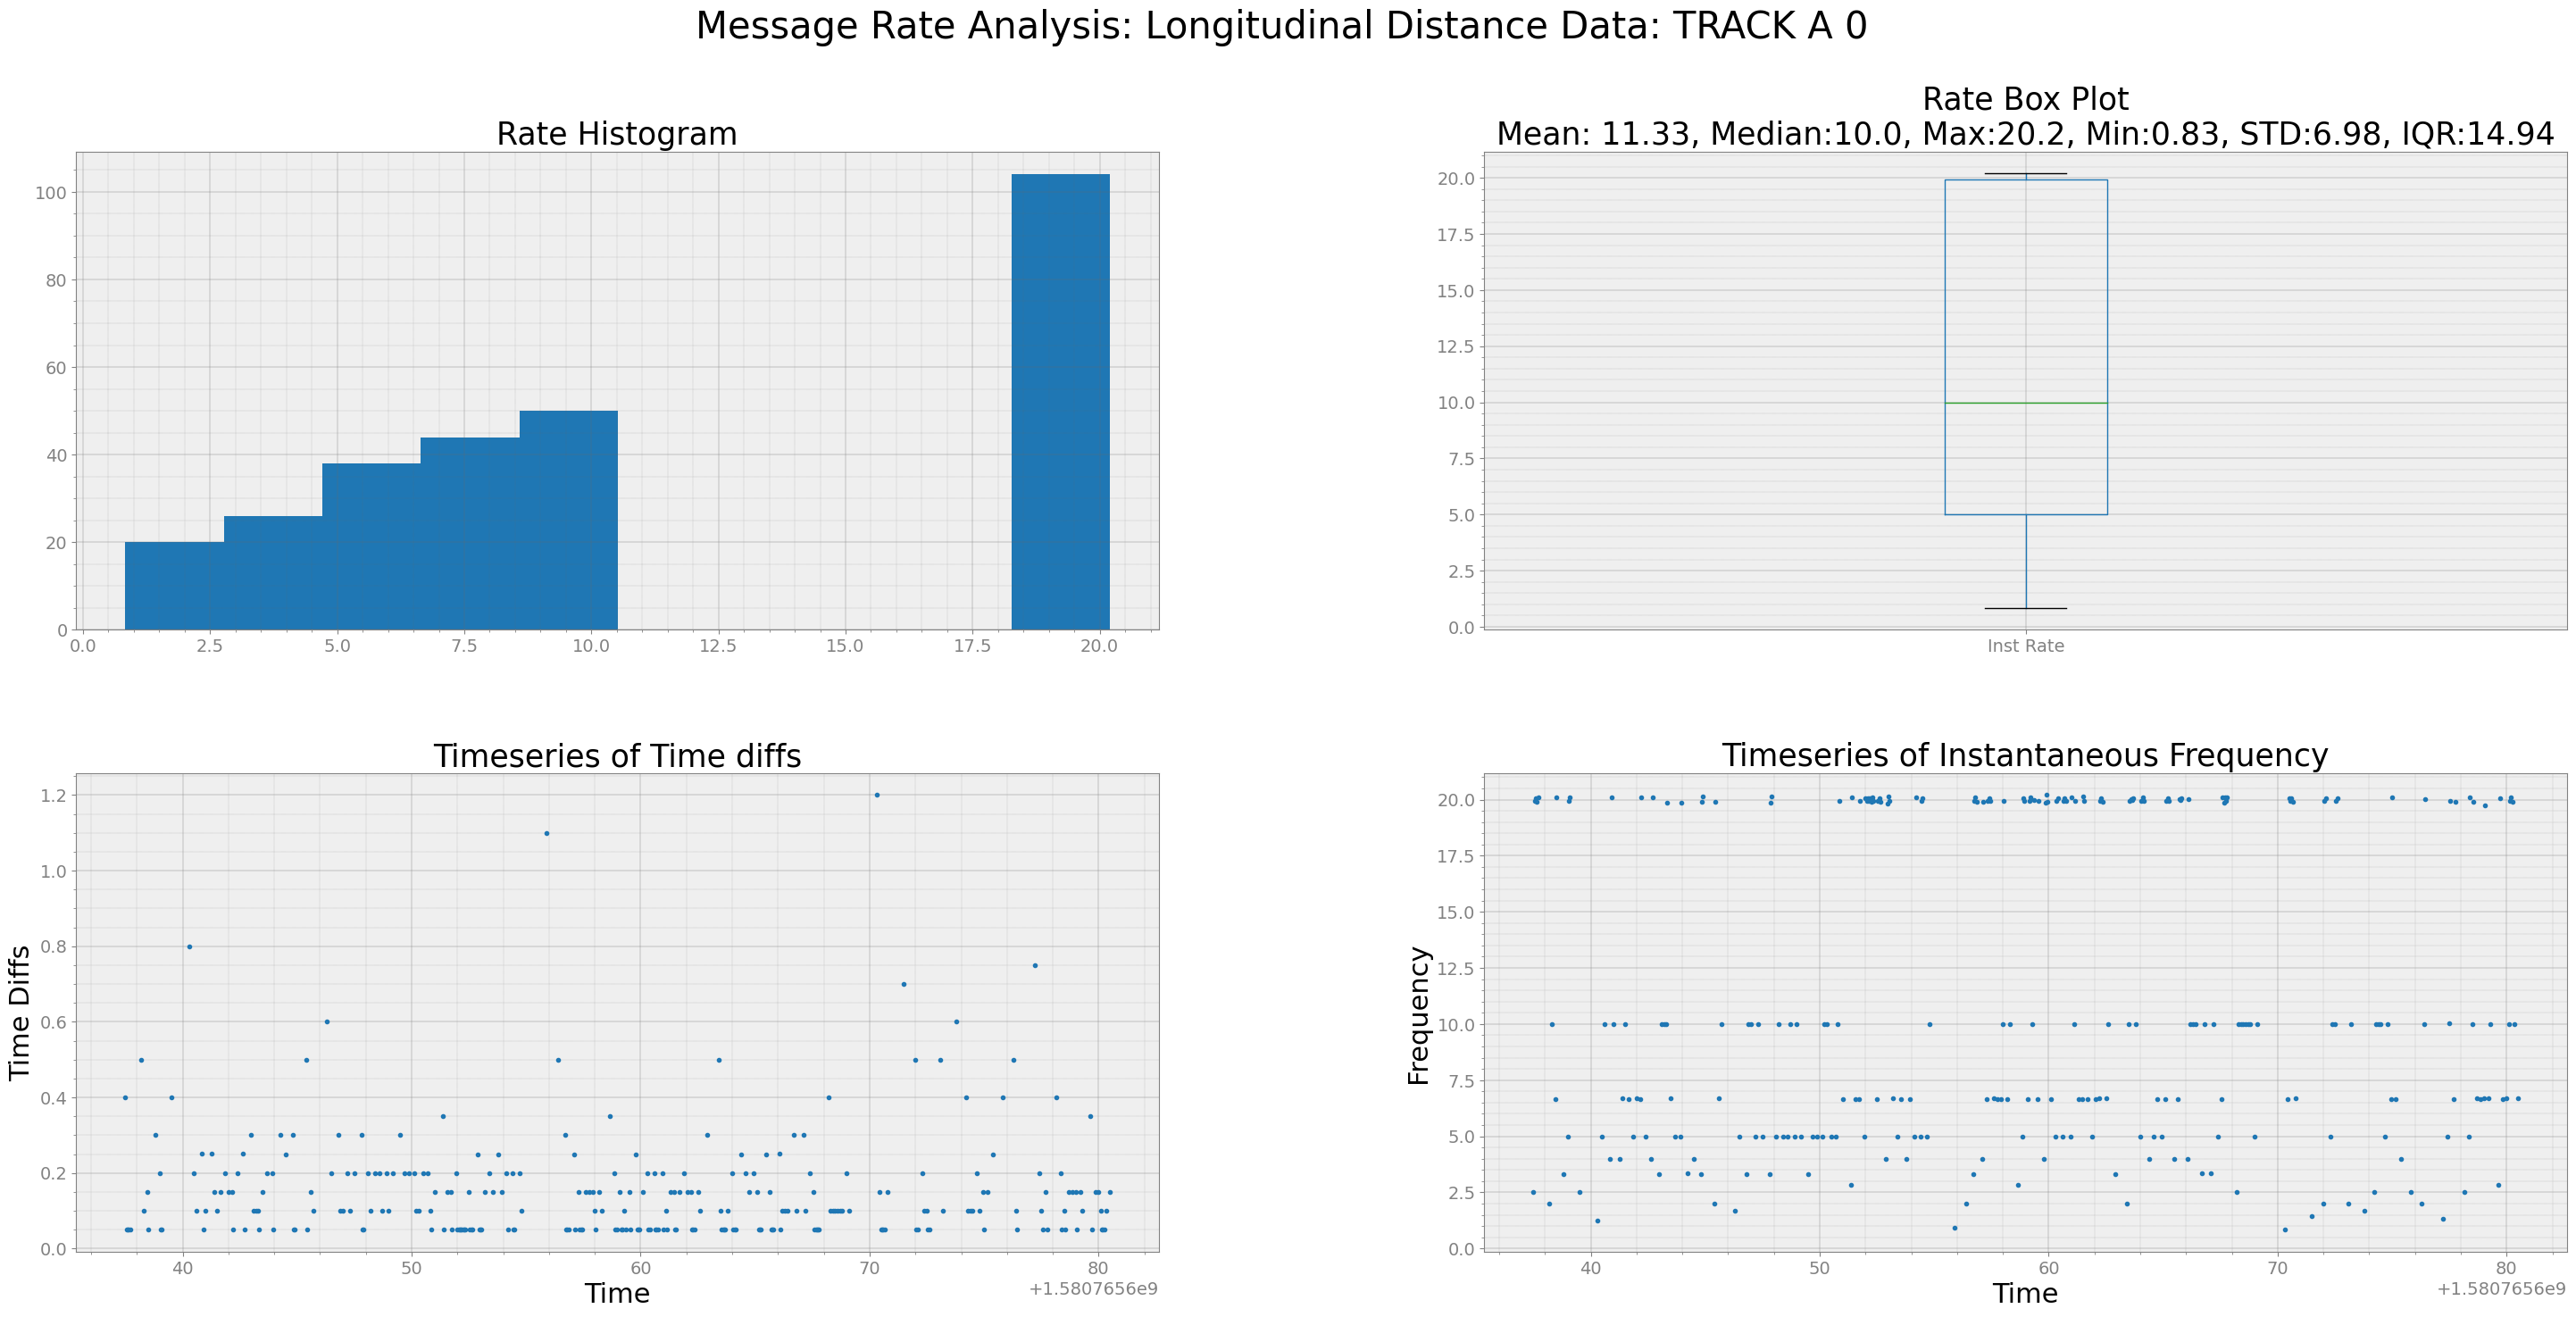

In [11]:
long_dist = r0.long_dist(track_id = 0) # I want to analyze rate for TRACK_A_0 only

strymread.ranalyze(long_dist, title='Longitudinal Distance Data: TRACK A 0')

From above plot, we see that most of the RADAR traces arrive at 20 Hz.

### 2. CSV file TRACK_A_0 only
Second CSV file has only 

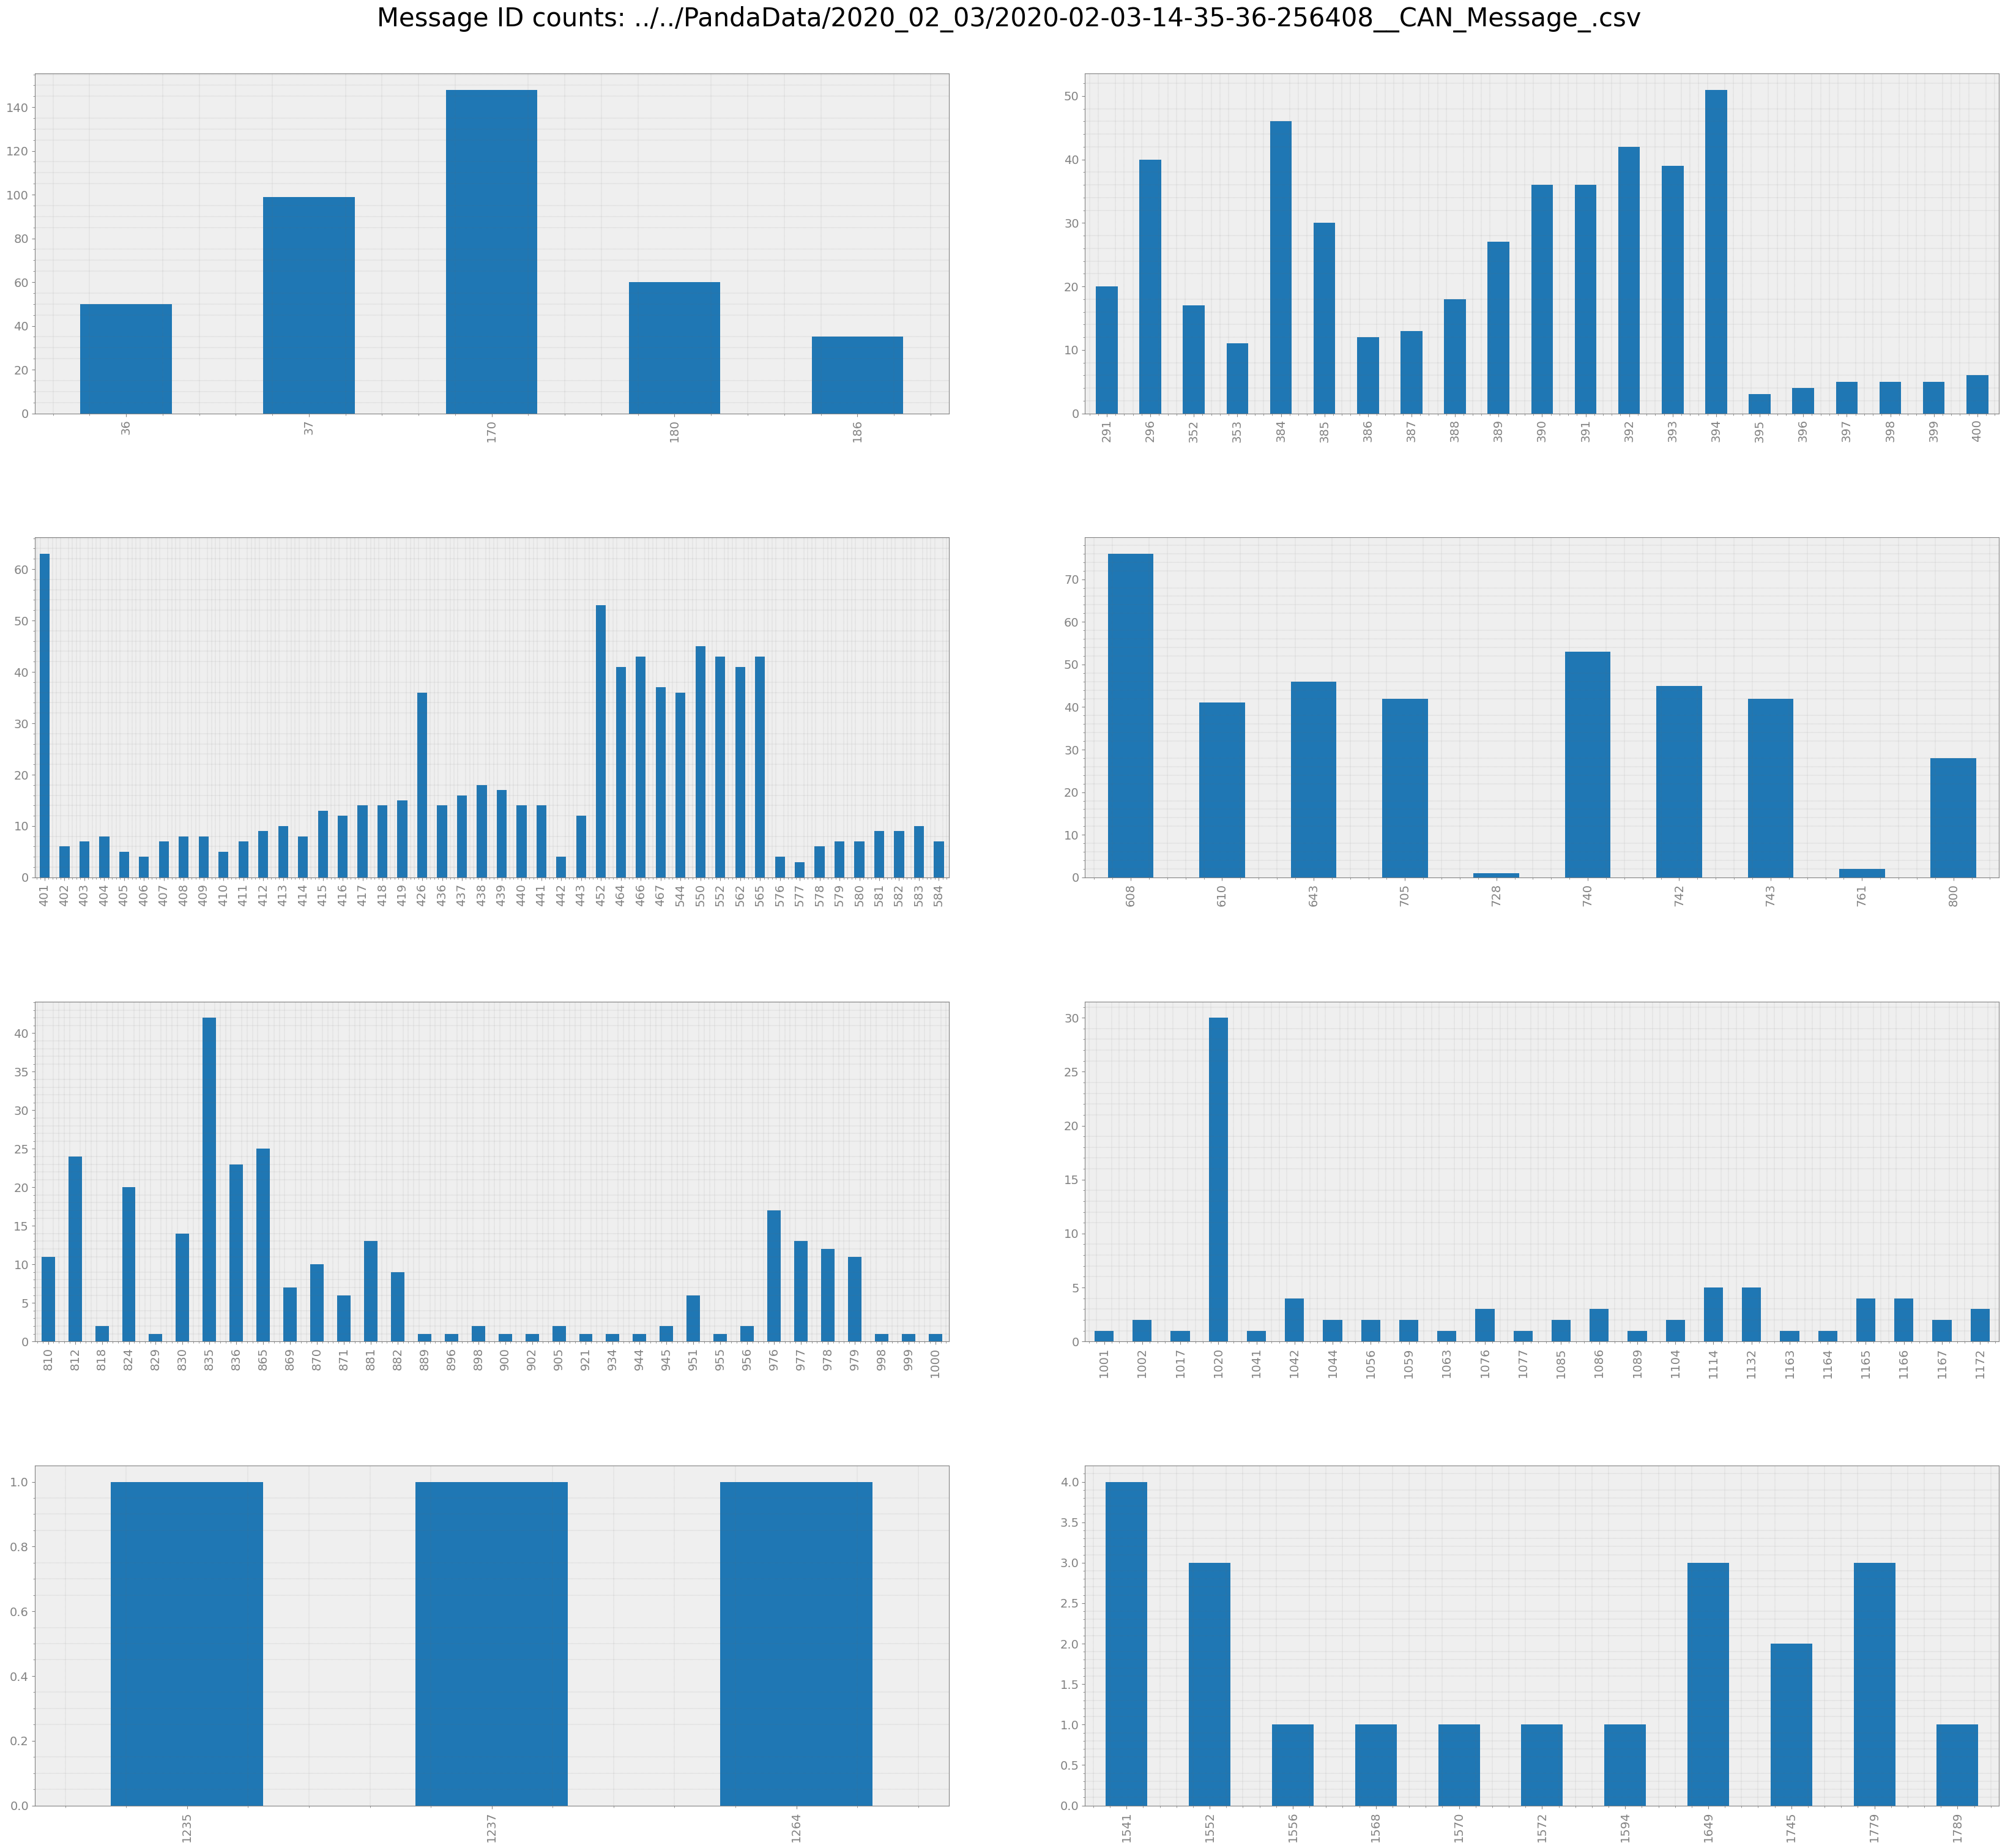

,MessageID,Counts_Bus_0,Counts_Bus_1,TotalCount
36,36,50,0,50
37,37,99,0,99
170,170,148,0,148
180,180,60,0,60
186,186,35,0,35
...,...,...,...,...
1594,1594,1,0,1
1649,1649,3,0,3
1745,1745,2,0,2
1779,1779,3,0,3


In [12]:
r2 = strymread(csvfile=csvlist[2], dbcfile=dbcfile)
r2.count(plot=True)

Analyzing Timestamp and Data Rate of Longitudinal Distance Data: TRACK A 0
Interquartile Range of Rate for Longitudinal Distance Data: TRACK A 0 is 1.6764377555817518 


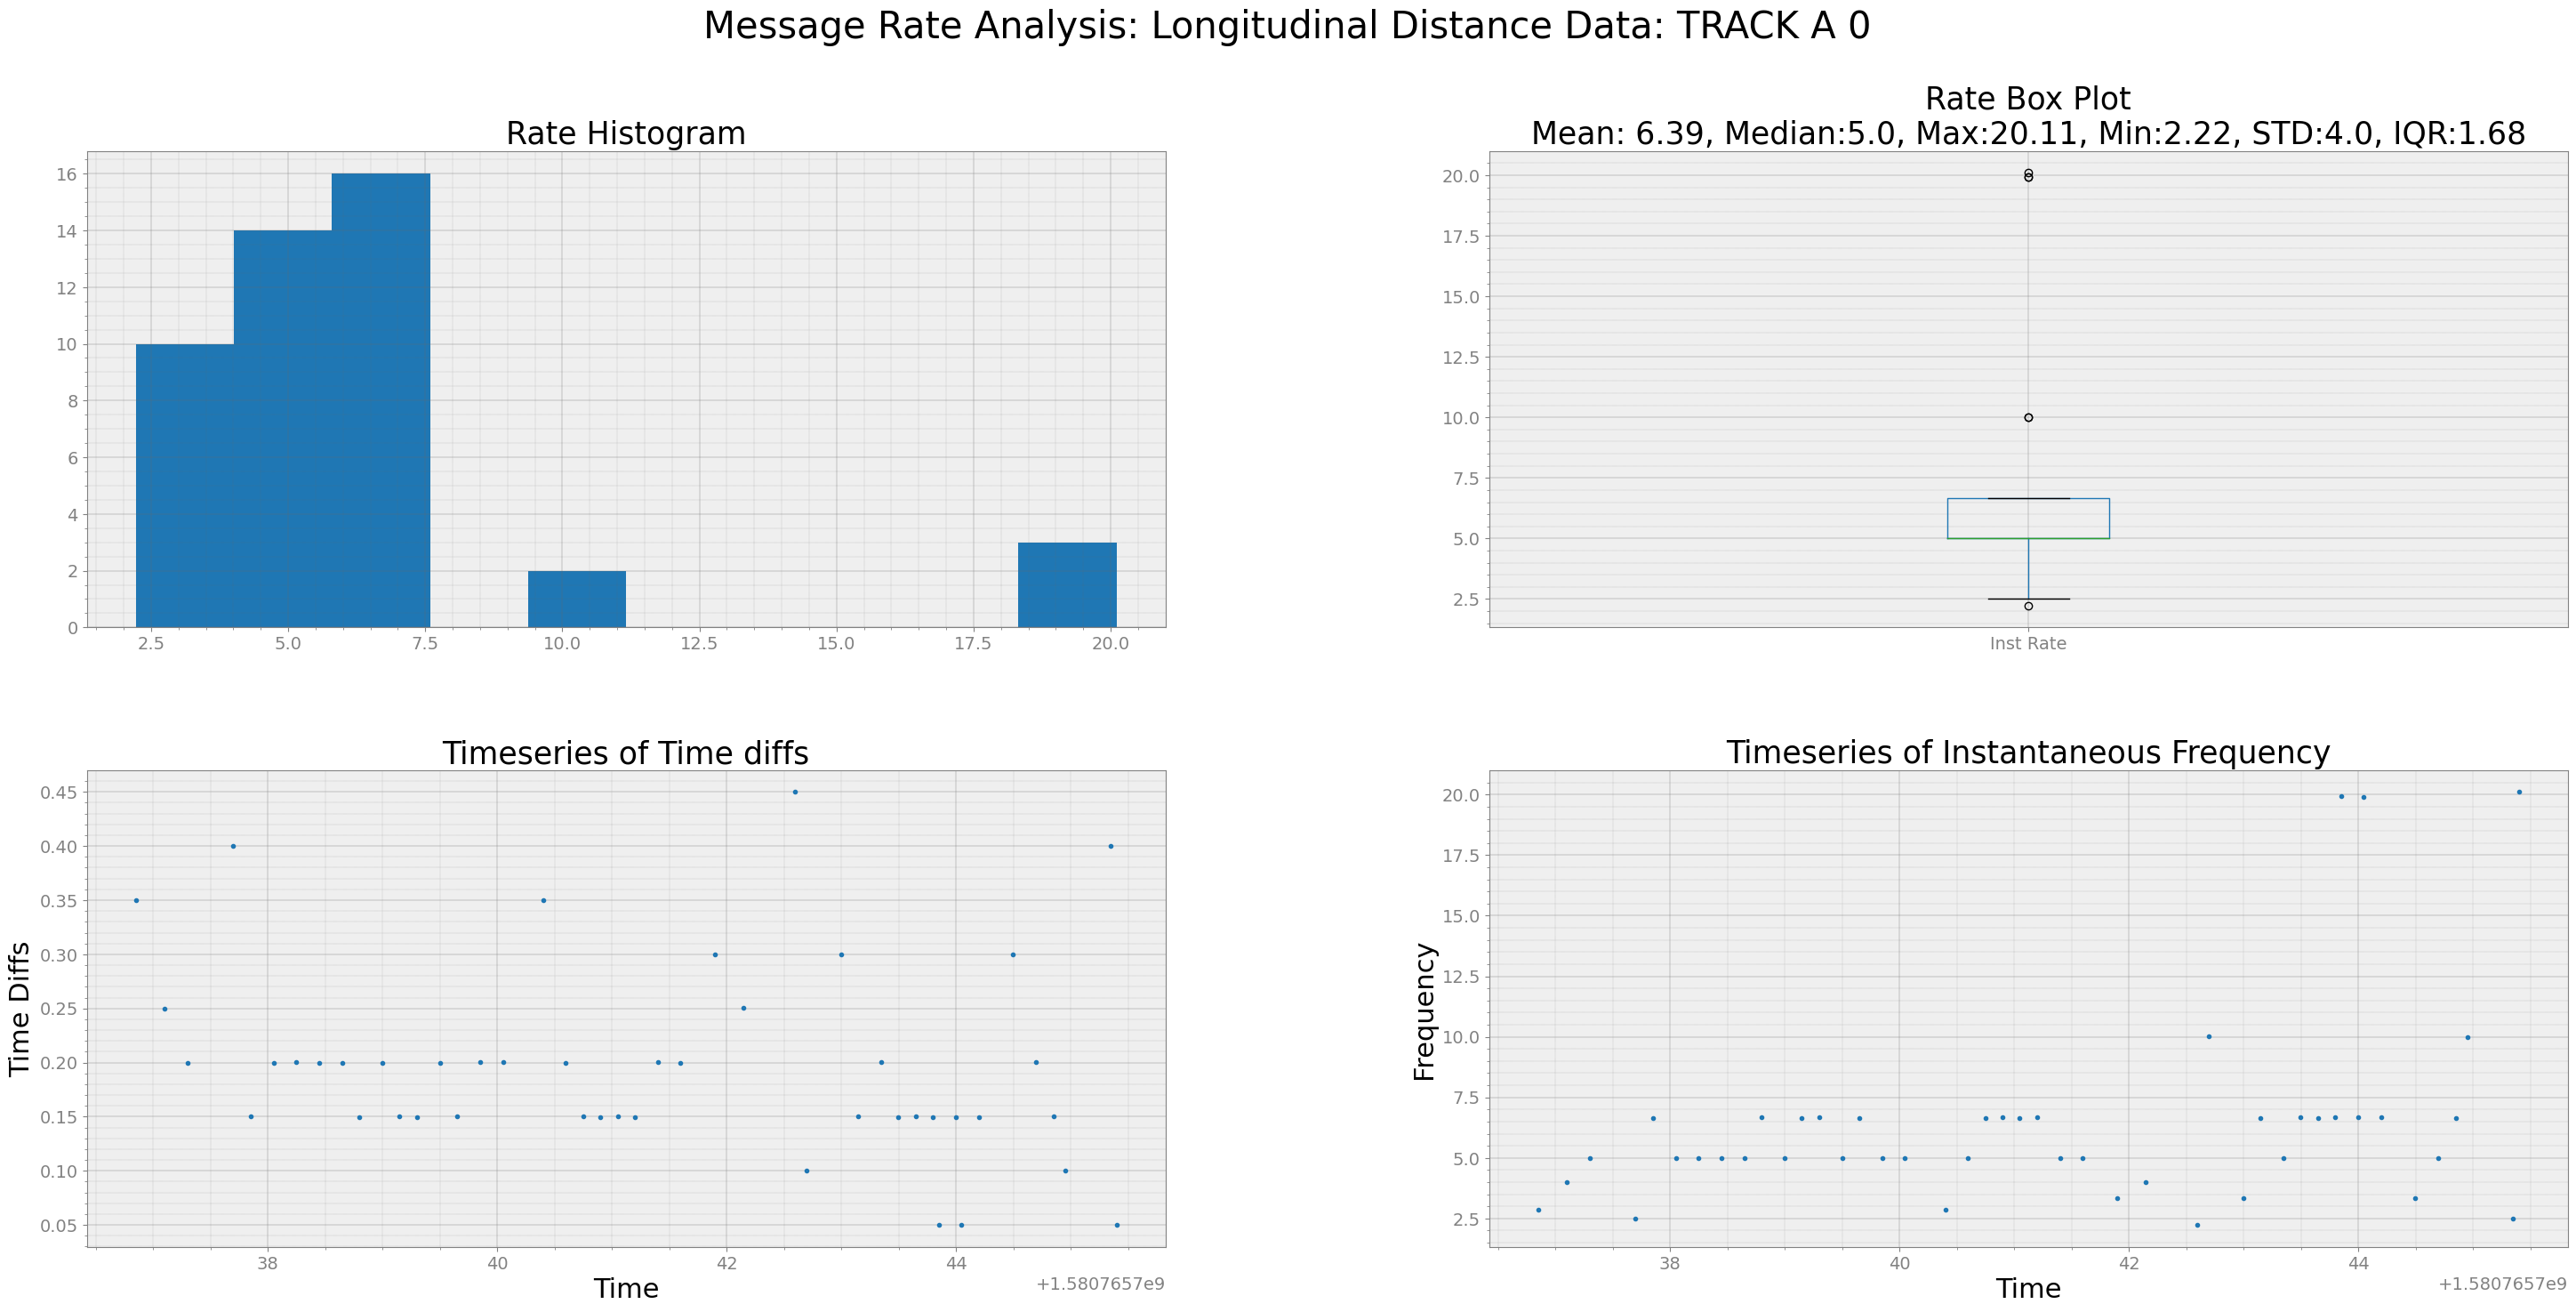

In [13]:
long_dist = r2.long_dist(track_id = 0)  # I want to analyze rate for TRACK_A_0 only

strymread.ranalyze(long_dist, title='Longitudinal Distance Data: TRACK A 0')

I remember, while doing this run, we didn't receive data from TRAC A 0 much

### 3. CSV file TRACK_B_0 only

In [14]:
r4 = strymread(csvfile=csvlist[4], dbcfile=dbcfile)
r4.count()

,MessageID,Counts_Bus_0,Counts_Bus_1,TotalCount
36,36,881,0,881
37,37,1851,0,1851
170,170,1789,0,1789
180,180,948,0,948
186,186,466,0,466
...,...,...,...,...
1779,1779,11,0,11
1786,1786,6,0,6
1787,1787,12,0,12
1788,1788,12,0,12


Analyzing Timestamp and Data Rate of Relative Acceleration Data of Detected Object: TRACK B 0
Interquartile Range of Rate for Relative Acceleration Data of Detected Object: TRACK B 0 is 7.510171798655167 


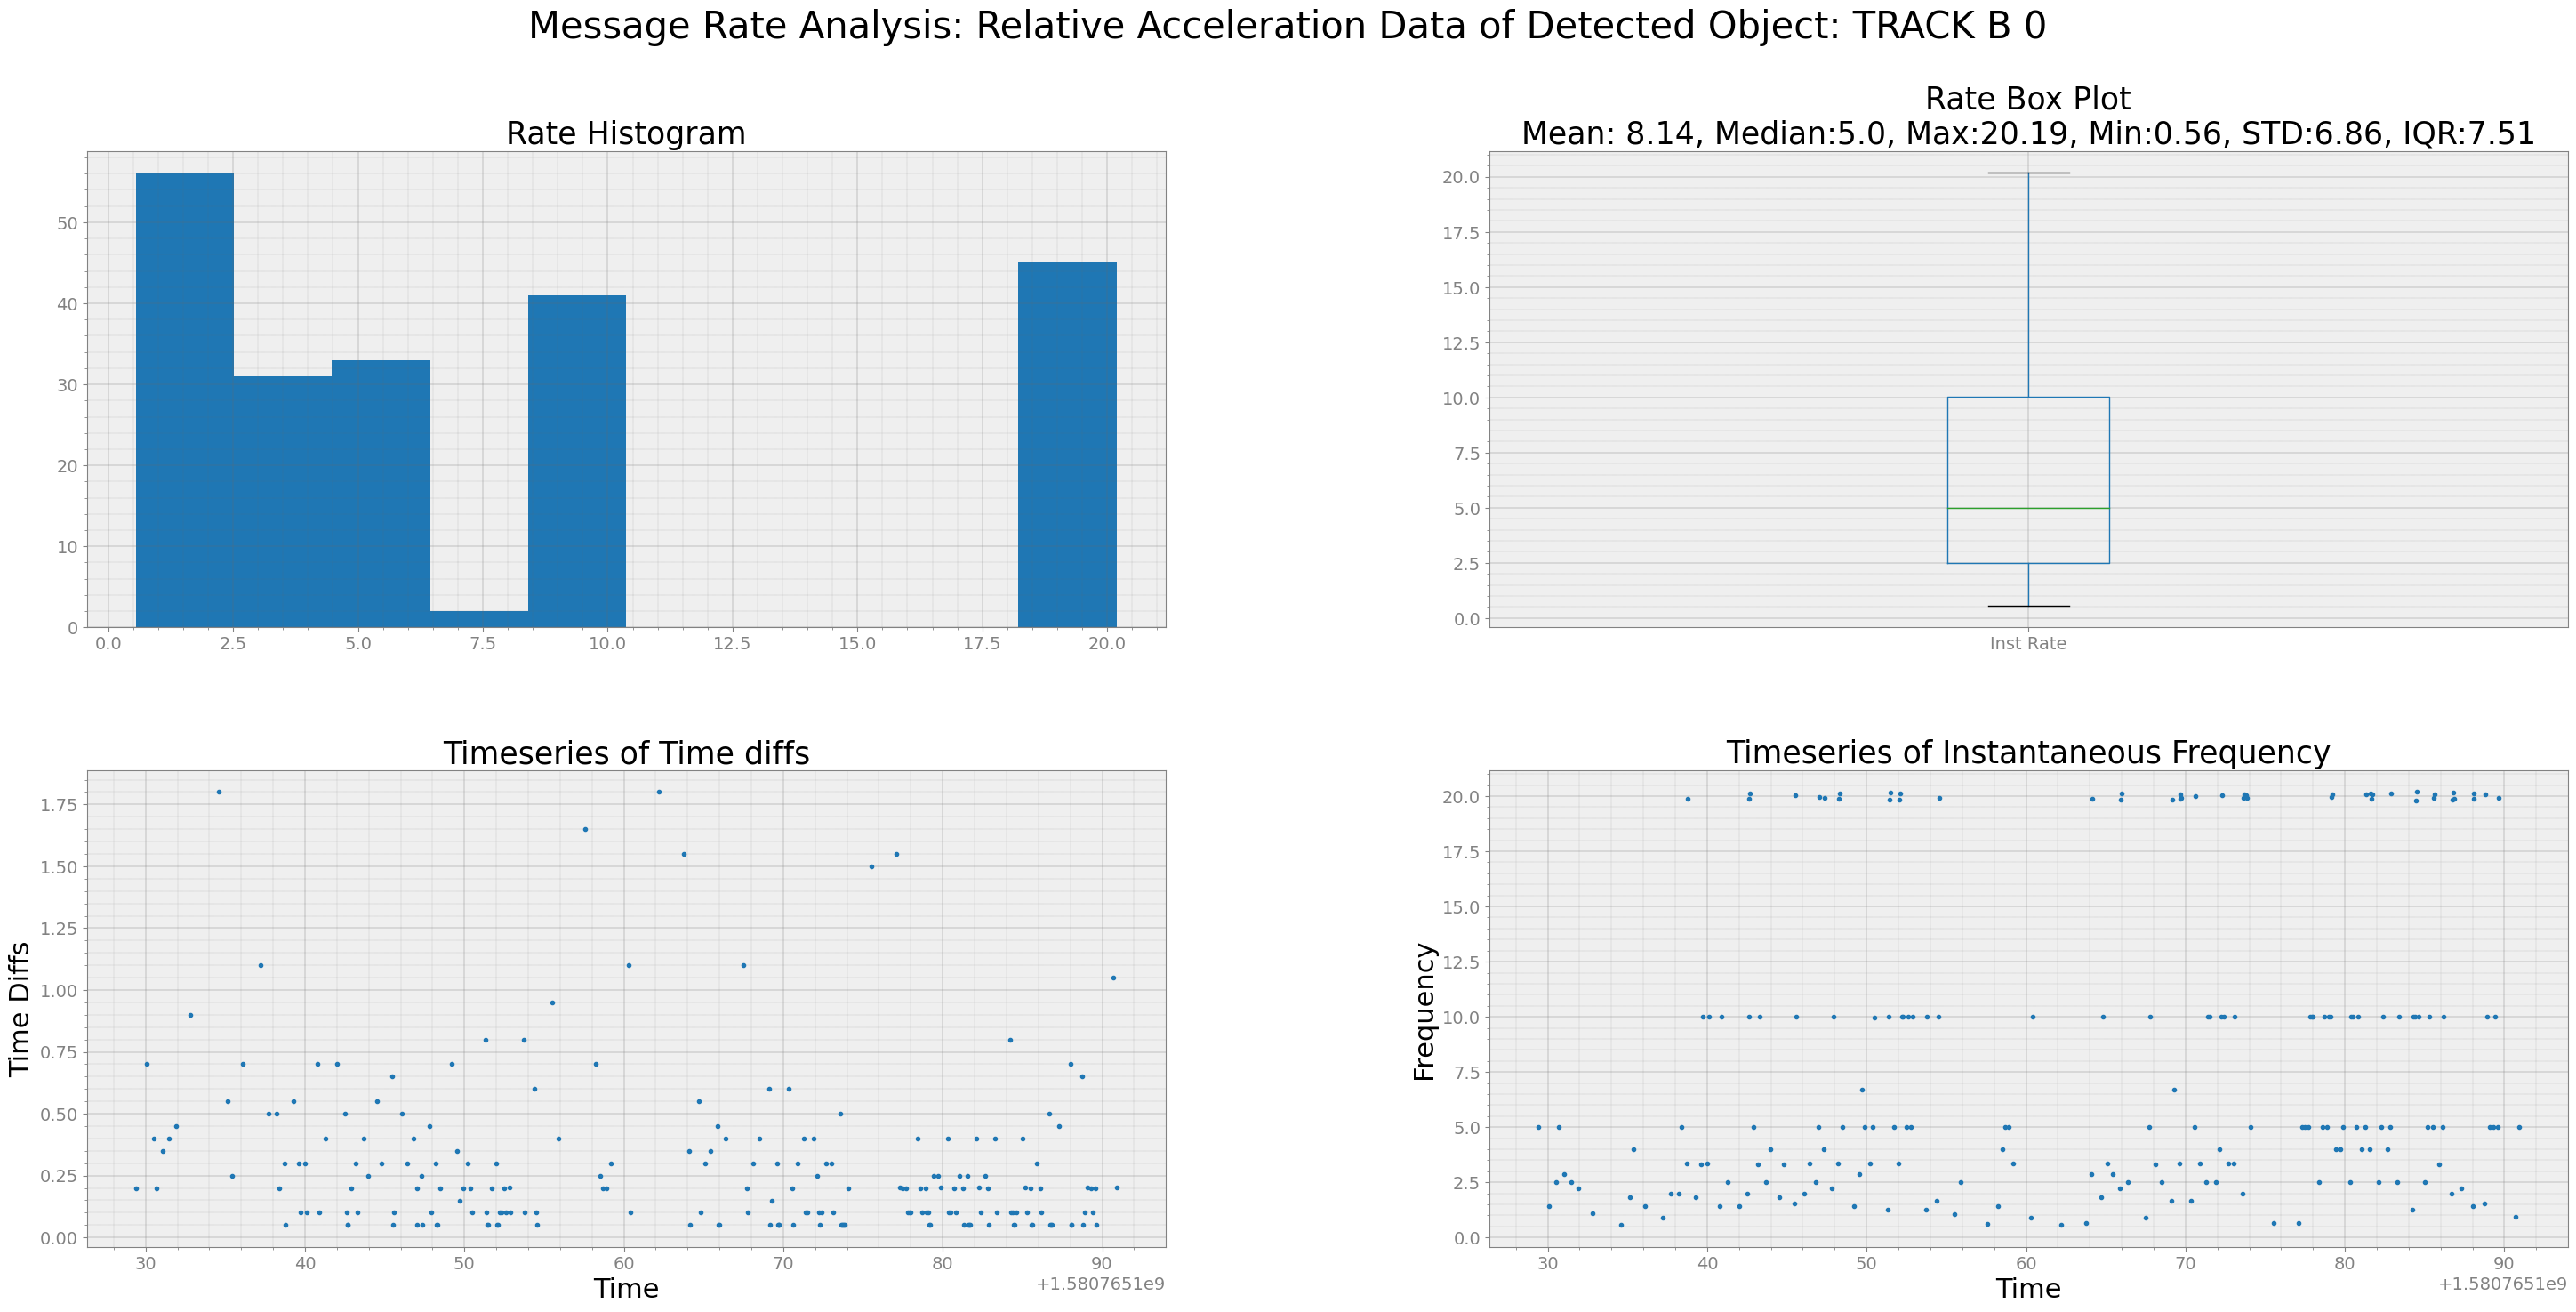

In [16]:
rel_accel = r4.rel_accel(track_id = 0)# I want to analyze rate for TRACK_B_0 only

strymread.ranalyze(rel_accel, title='Relative Acceleration Data of Detected Object: TRACK B 0')

### 4. CSV file SPEED, TRACK_A_0 and TRACK_B_0 only
This file has all speed 0, as we didn't drive anywhere.

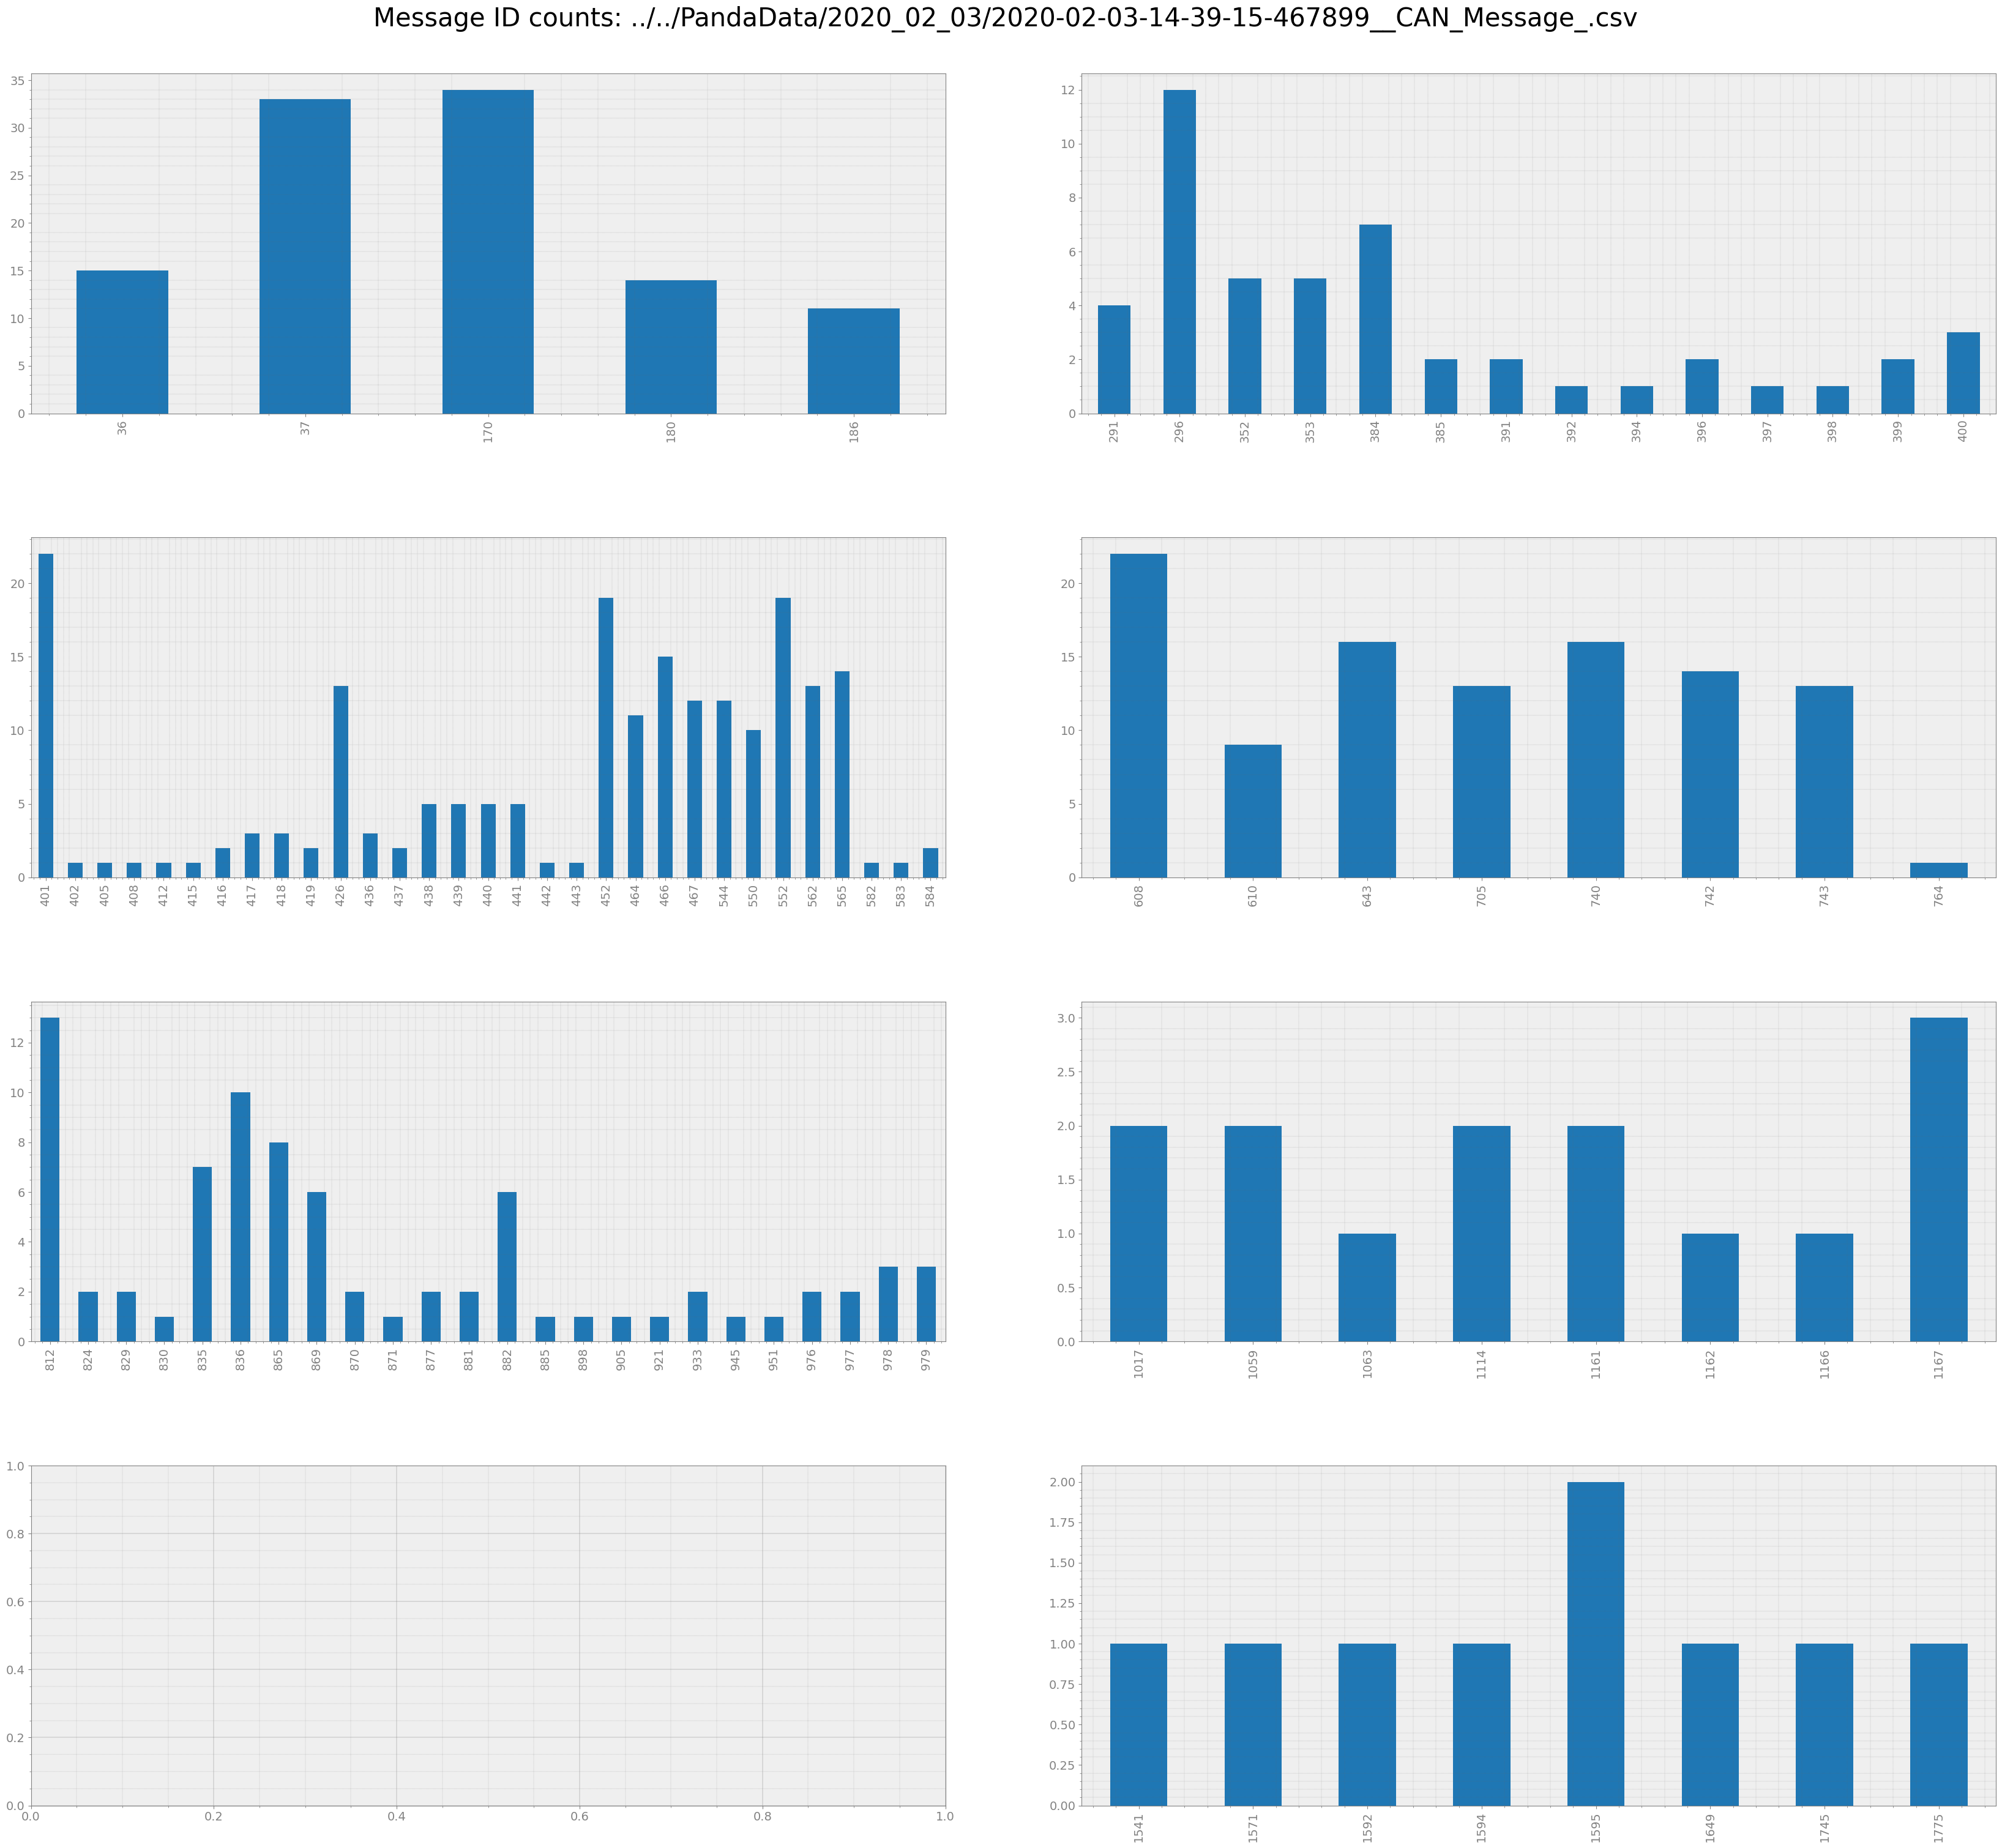

,MessageID,Counts_Bus_0,Counts_Bus_1,TotalCount
36,36,15,0,15
37,37,33,0,33
170,170,34,0,34
180,180,14,0,14
186,186,11,0,11
...,...,...,...,...
1594,1594,1,0,1
1595,1595,2,0,2
1649,1649,1,0,1
1745,1745,1,0,1


In [18]:
r5 = strymread(csvfile=csvlist[5], dbcfile=dbcfile)
r5.count(plot=True)

Analyzing Timestamp and Data Rate of Speed Data
Interquartile Range of Rate for Speed Data is 2.2179331459225313 


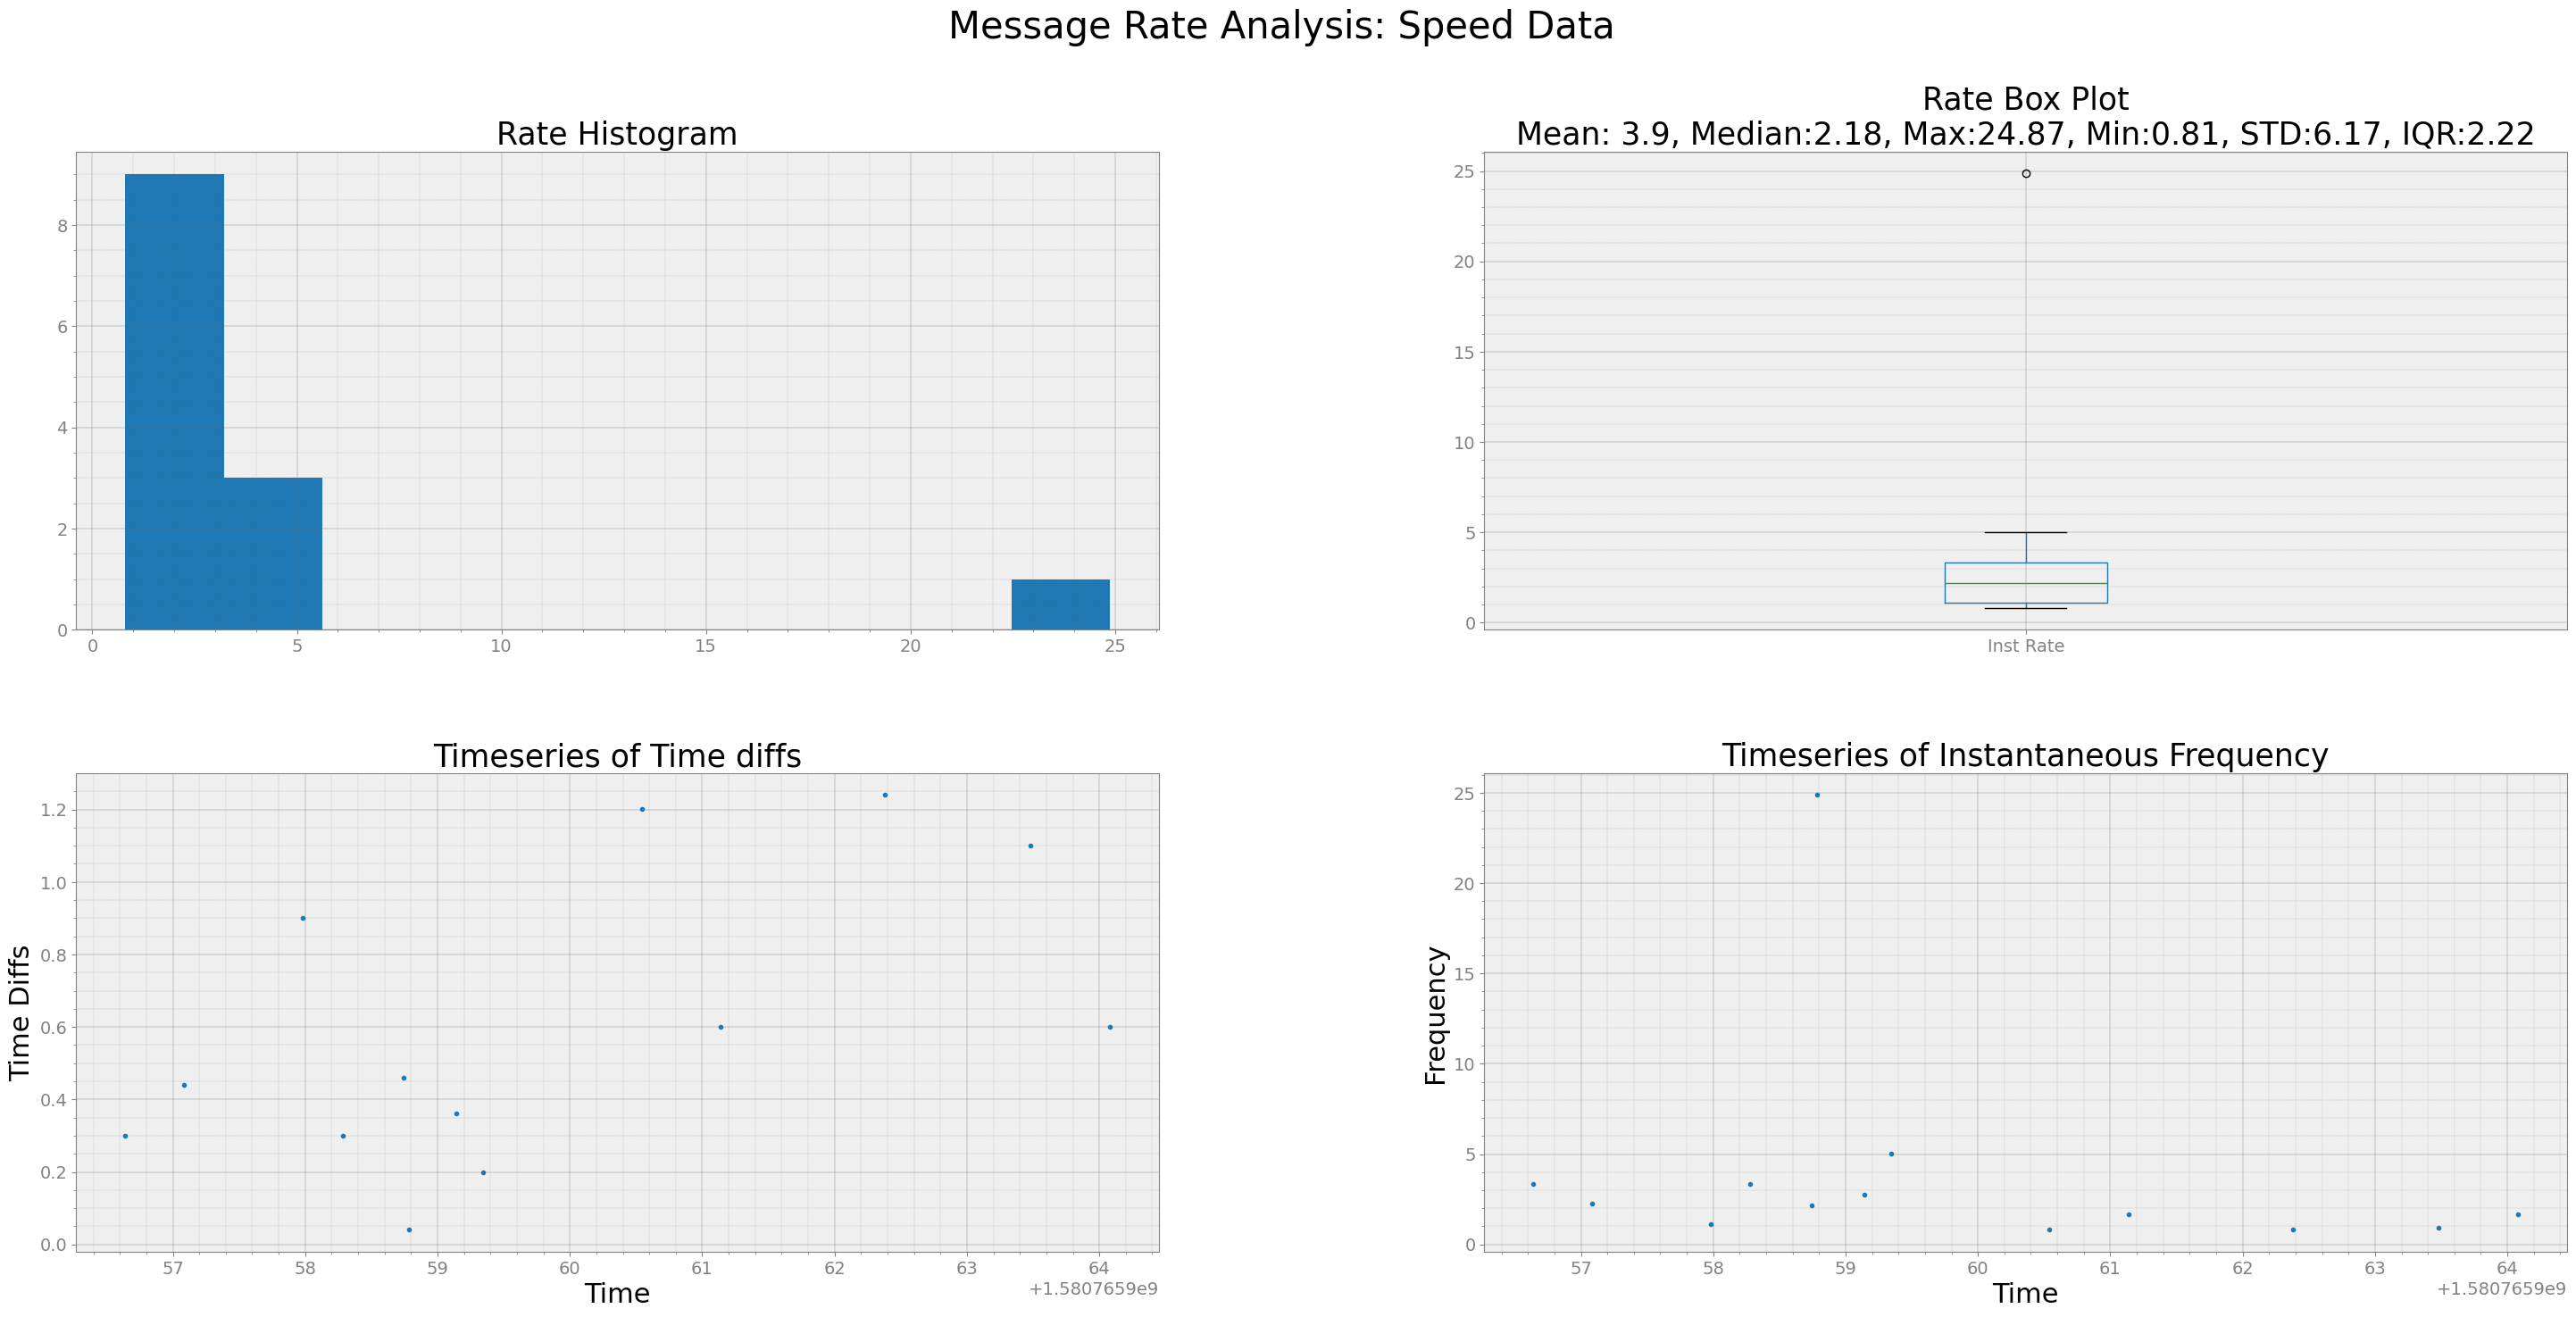

In [21]:
strymread.ranalyze(speed, title='Speed Data')

Analyzing Timestamp and Data Rate of Longitudinal Distance Data: TRACK A 0
Interquartile Range of Rate for Longitudinal Distance Data: TRACK A 0 is 0.5527337504044729 


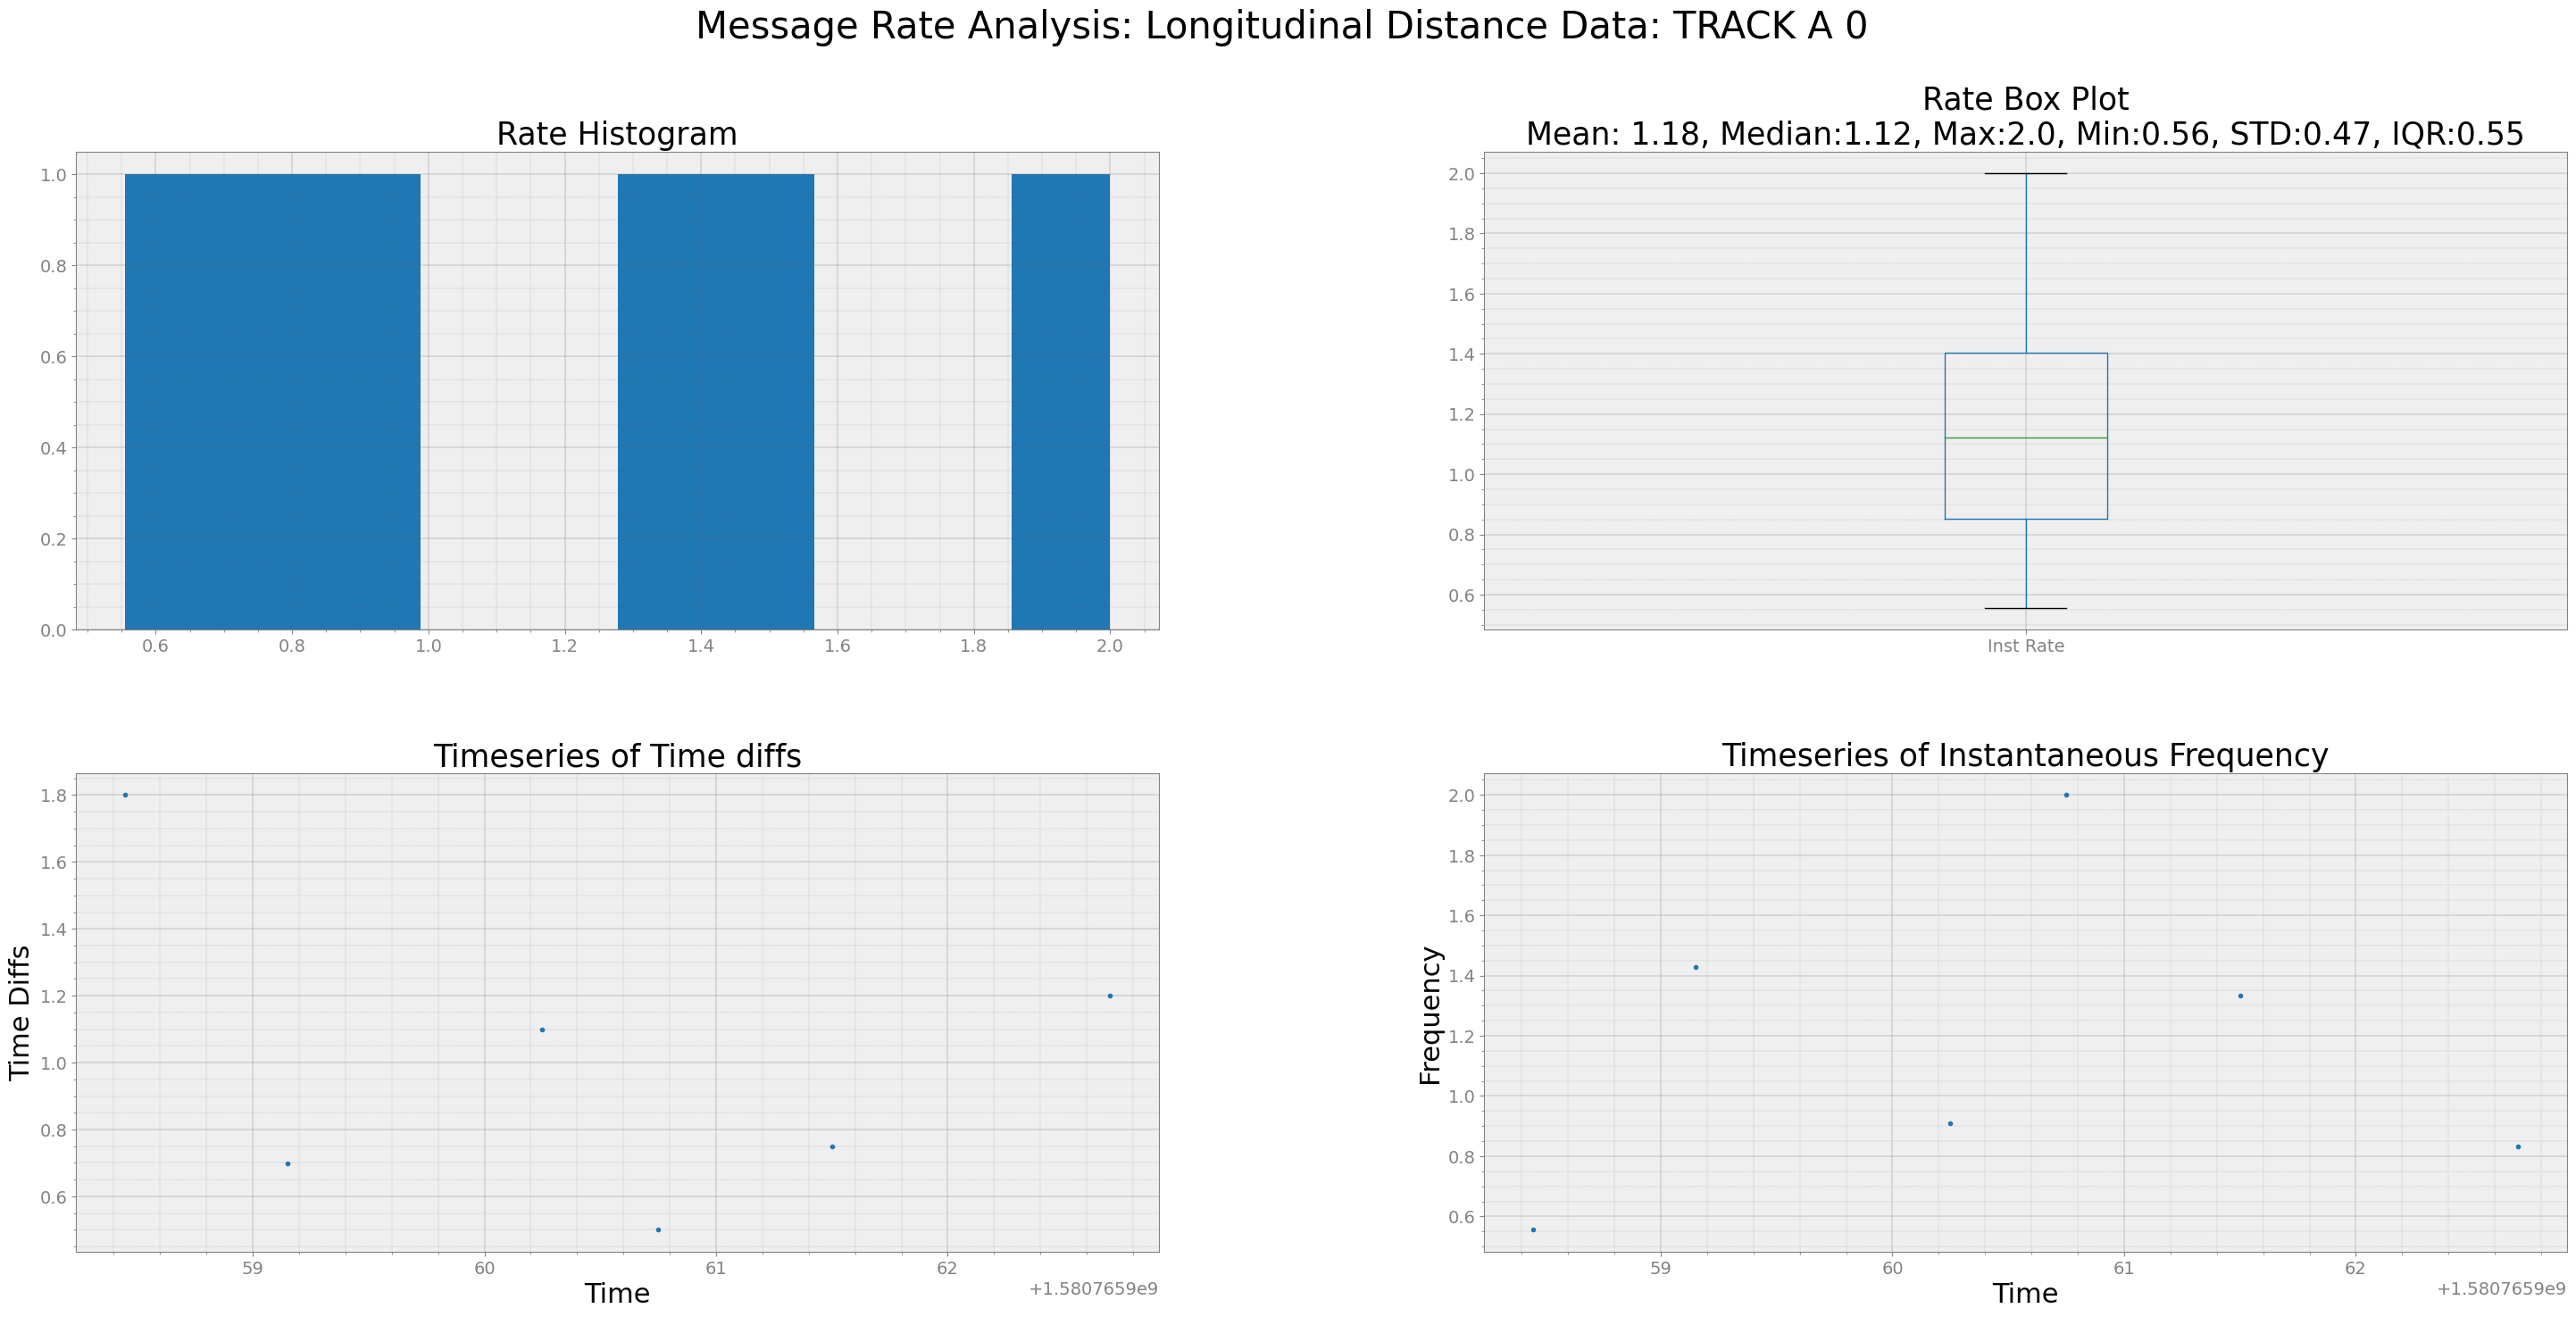

In [23]:
long_dist = r5.long_dist(track_id = 0) # I want to analyze rate for TRACK_A_0 only

strymread.ranalyze(long_dist, title='Longitudinal Distance Data: TRACK A 0')

Analyzing Timestamp and Data Rate of Relative Acceleration Data of Detected Object: TRACK B 0
Interquartile Range of Rate for Relative Acceleration Data of Detected Object: TRACK B 0 is 0.06944385989934465 


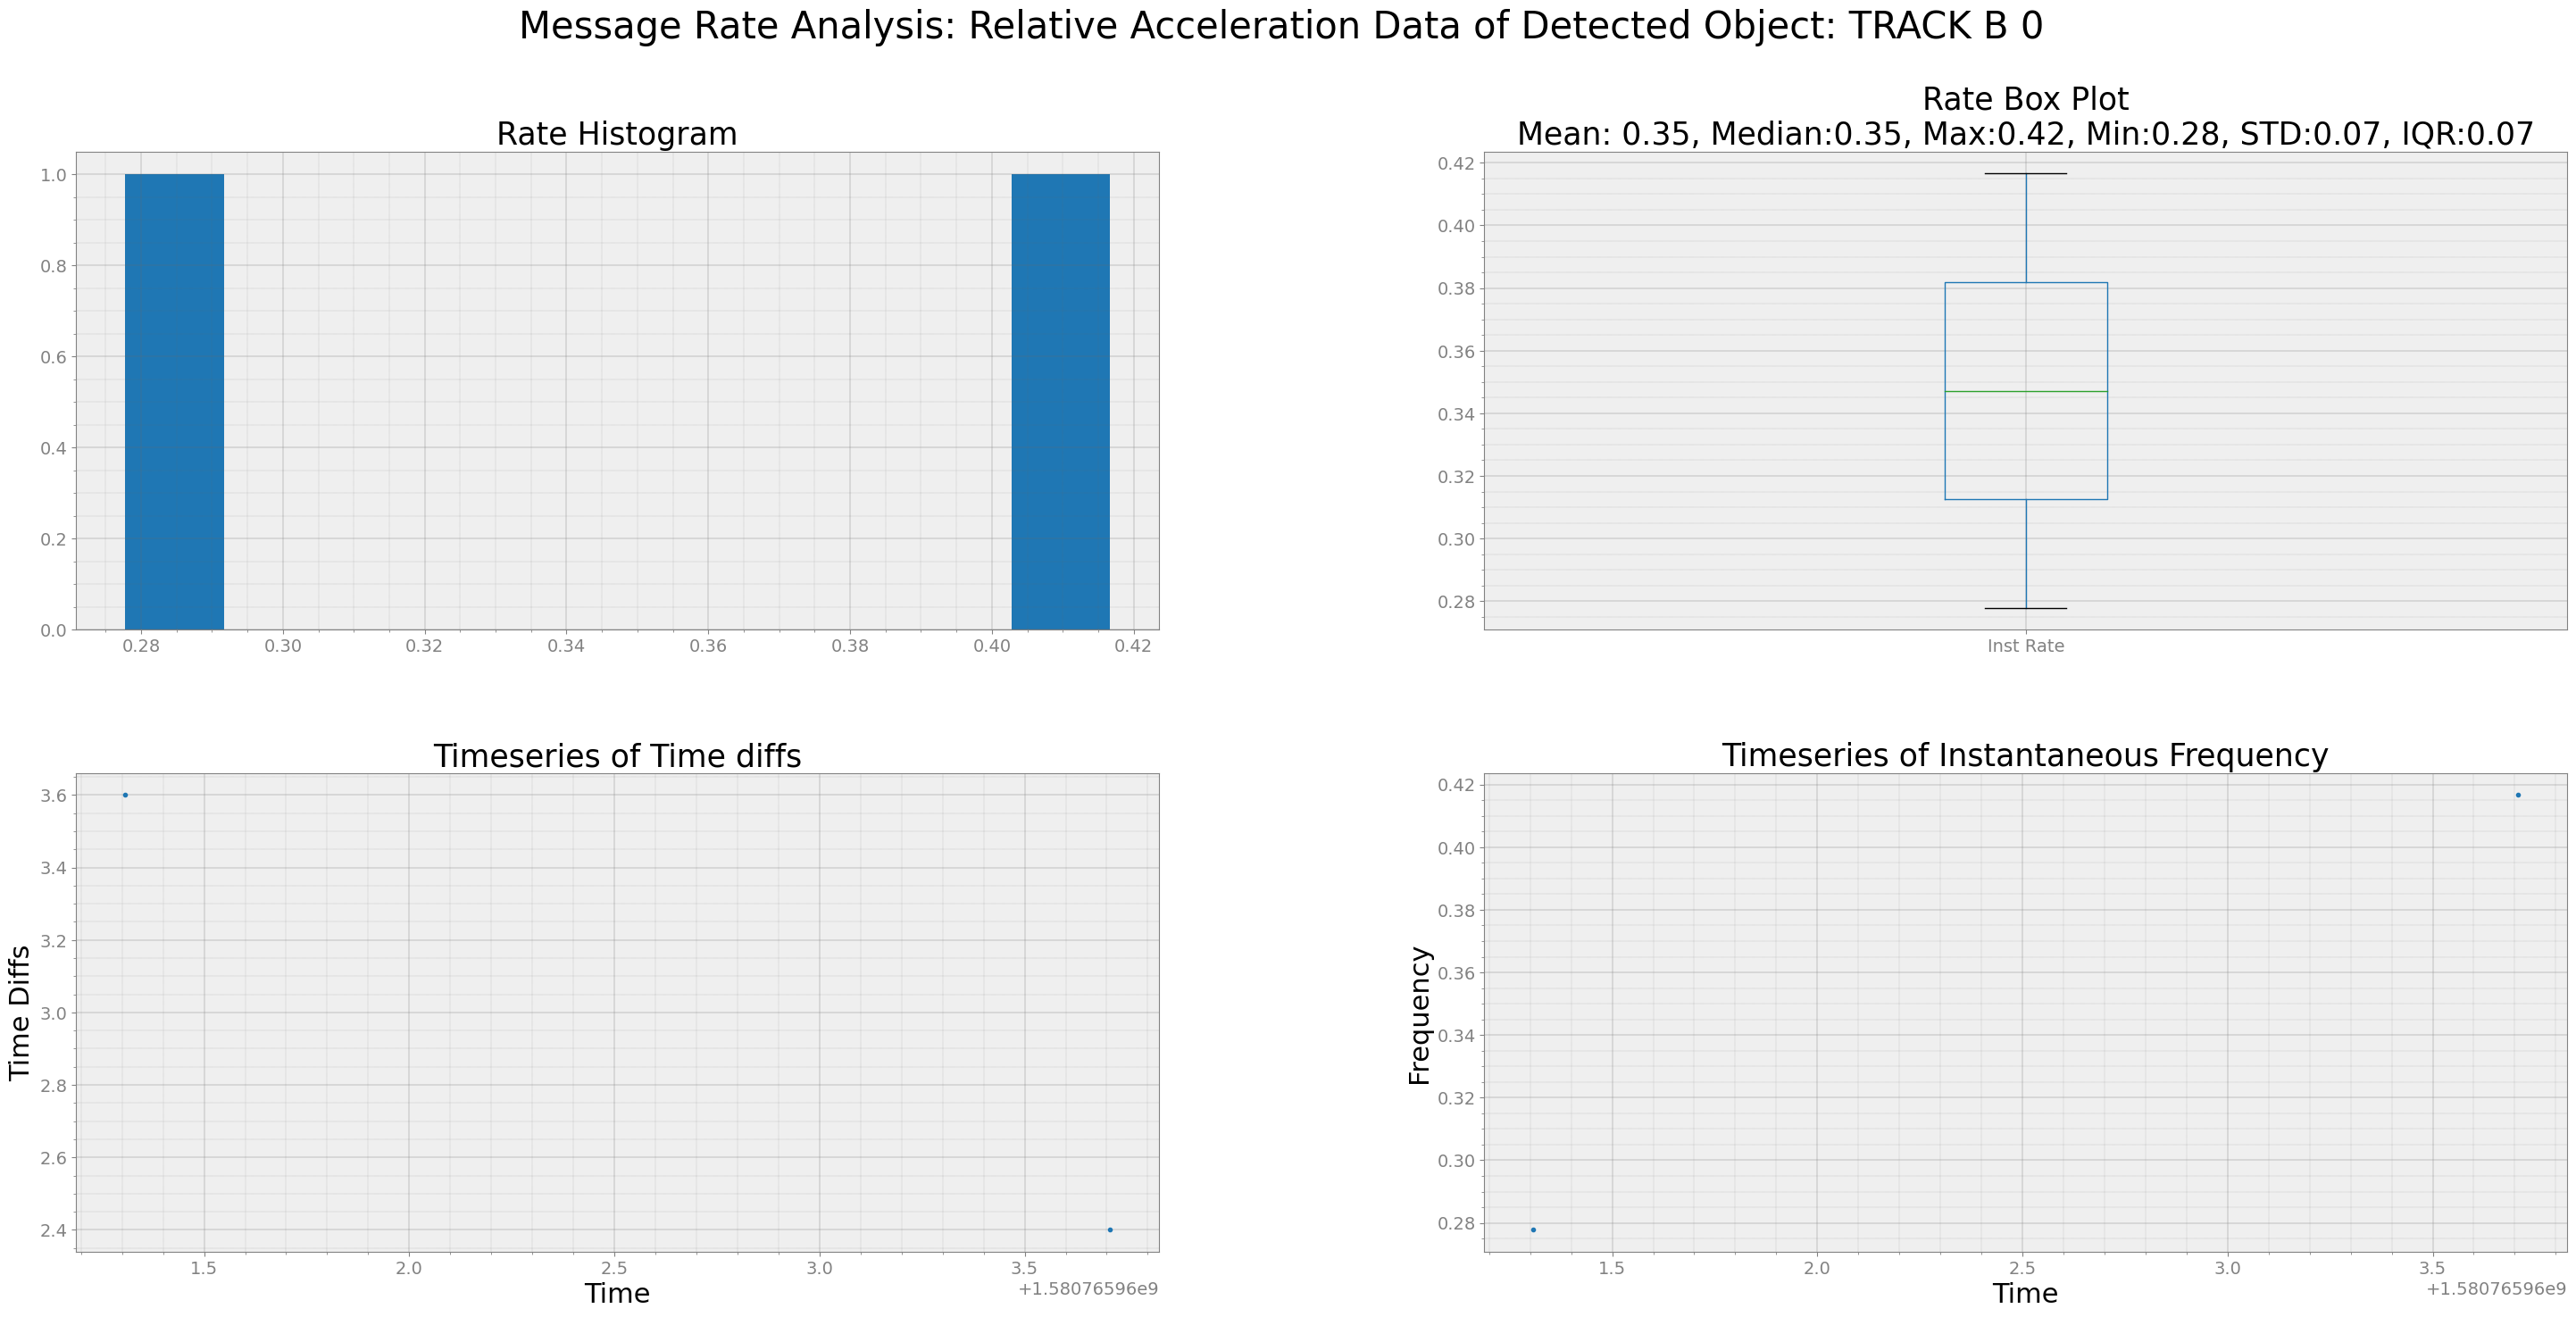

In [25]:
rel_accel = r5.rel_accel(track_id  = 0) # I want to analyze rate for TRACK_B_0 only

strymread.ranalyze(rel_accel, title='Relative Acceleration Data of Detected Object: TRACK B 0')